# Replicación de archivo examples.py 
Para empezar importamos las funciones princiales de ARRT y los parametros de la simulación 

In [2]:
import os
import sys
import platform
# Original path
sistema = platform.system()
print(f"Estás en: {sistema}")

if sistema == "Windows":
    ruta_original = r"C:\Users\danyp\OneDrive\Escritorio\CosasPater\UNAL\TrabajoGradoAlejandro\VariabilityOfBlackHoleLightCurves"
elif sistema == "Linux":
    ruta_original = r"Linux path"
else:
    print(f"No pude identificar el sistema: {sistema}")
    
print(f"Ruta original: {ruta_original}")

# Path of aart_main
if sistema == "Windows":
    ruta_aart =r'C:\Users\danyp\OneDrive\Escritorio\CosasPater\UNAL\TrabajoGradoAlejandro\aart_main'
elif sistema == "Linux":
    ruta_aart == r"Linux path"
else:
    print(f"No pude identificar el sistema: {sistema}")
    
ruta_aart_main = os.path.join(ruta_original,ruta_aart)
print(f"Ruta de aart_main: {ruta_aart_main}")

# Change the working directory so that Python thinks you are inside aart_main
os.chdir(ruta_aart_main)
print(f"Ruta actual después de cambio: {os.getcwd()}")

# put the original path to sys.path for use aart_main 
if ruta_original not in sys.path:
    sys.path.append(ruta_original)
    print(f"Agregado a sys.path: {ruta_original}")

## aart_func is a file with the functions for the image generation
from aart_func import *
## params have all the important params of the simulation
from params import *

Estás en: Windows
Ruta original: C:\Users\danyp\OneDrive\Escritorio\CosasPater\UNAL\TrabajoGradoAlejandro\VariabilityOfBlackHoleLightCurves
Ruta de aart_main: C:\Users\danyp\OneDrive\Escritorio\CosasPater\UNAL\TrabajoGradoAlejandro\aart_main
Ruta actual después de cambio: C:\Users\danyp\OneDrive\Escritorio\CosasPater\UNAL\TrabajoGradoAlejandro\aart_main

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

A directory (Results) was created to store the results


## Generación de las Lensing Bands 
Para generarlas recurrimos a la función en aart_func, la intencion es inicialmente generar las lensing bands para posteriormente realizar el trazado de rayos. 
En la siguiente linea se debe tener en cuenta que:
1. `%time` es un comando que se utiliza para medir el tiempo de ejecución de una linea de codigo
2. `!python lensingbands.py` ejecuta el archivo de python llamado `lensingbands.py` 

In [4]:
%time !python lensingbands.py

CPU times: total: 641 ms
Wall time: 1min 56s

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  1562500
Number of points in the n=1 grid  1562500
Number of points in the n=2 grid  1562500
File  ./Results/LensingBands_a_0.5_i_17.h5  created.


Con esto ya se han calculado las lensing bands, lo siguiente sera leer los output del calculo para estudiar los resultados 

In [7]:
## Se crea un string con la dirección de donde se encuentran los resultados
fnbands = path + "LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

## Garantizamos cual sera el archivo donde se estaran guardando todos los datos 
print("reading file:",fnbands)

## Leemos los resultados utilizando h5py (lee archivos tipo .h5 que son jerarquicos)
h5f = h5py.File(fnbands,'r')

reading file: ./Results/LensingBands_a_0.5_i_17.h5


Lo siguiente es empezar a extraer los datos y ver elementos tenemos 

In [9]:
#Vemos cuales son los ´directorios´ en el archivo .h5
print(f'el archivo {fnbands} contiene los siguentes directorios: \n', list(h5f.keys()))

el archivo ./Results/LensingBands_a_0.5_i_17.h5 contiene los siguentes directorios: 
 ['N0', 'N1', 'N2', 'alpha', 'beta', 'grid0', 'grid1', 'grid2', 'hull_0e', 'hull_0i', 'hull_1e', 'hull_1i', 'hull_2e', 'hull_2i', 'lim0', 'lim1', 'lim2', 'mask0', 'mask1', 'mask2']


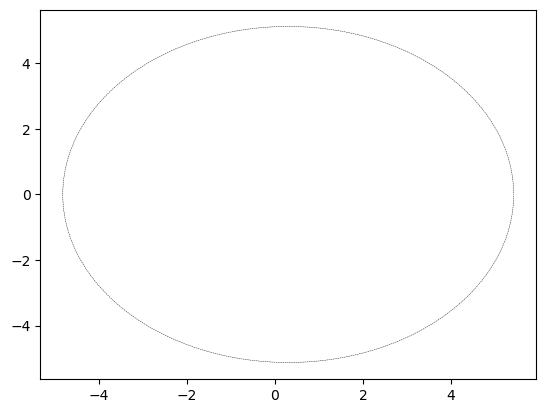

In [11]:
#Puntos donde se encuentra el limite de la sobra del agujero negro
#Tambien conocida como curva critica de Kerr
alpha_critic = h5f['alpha'][:]
beta_critic  = h5f['beta'][:]

plt.plot(alpha_critic,beta_critic, color='k',linewidth=0.3,linestyle="--")
plt.plot(alpha_critic,-beta_critic, color='k',linewidth=0.3,linestyle="--")

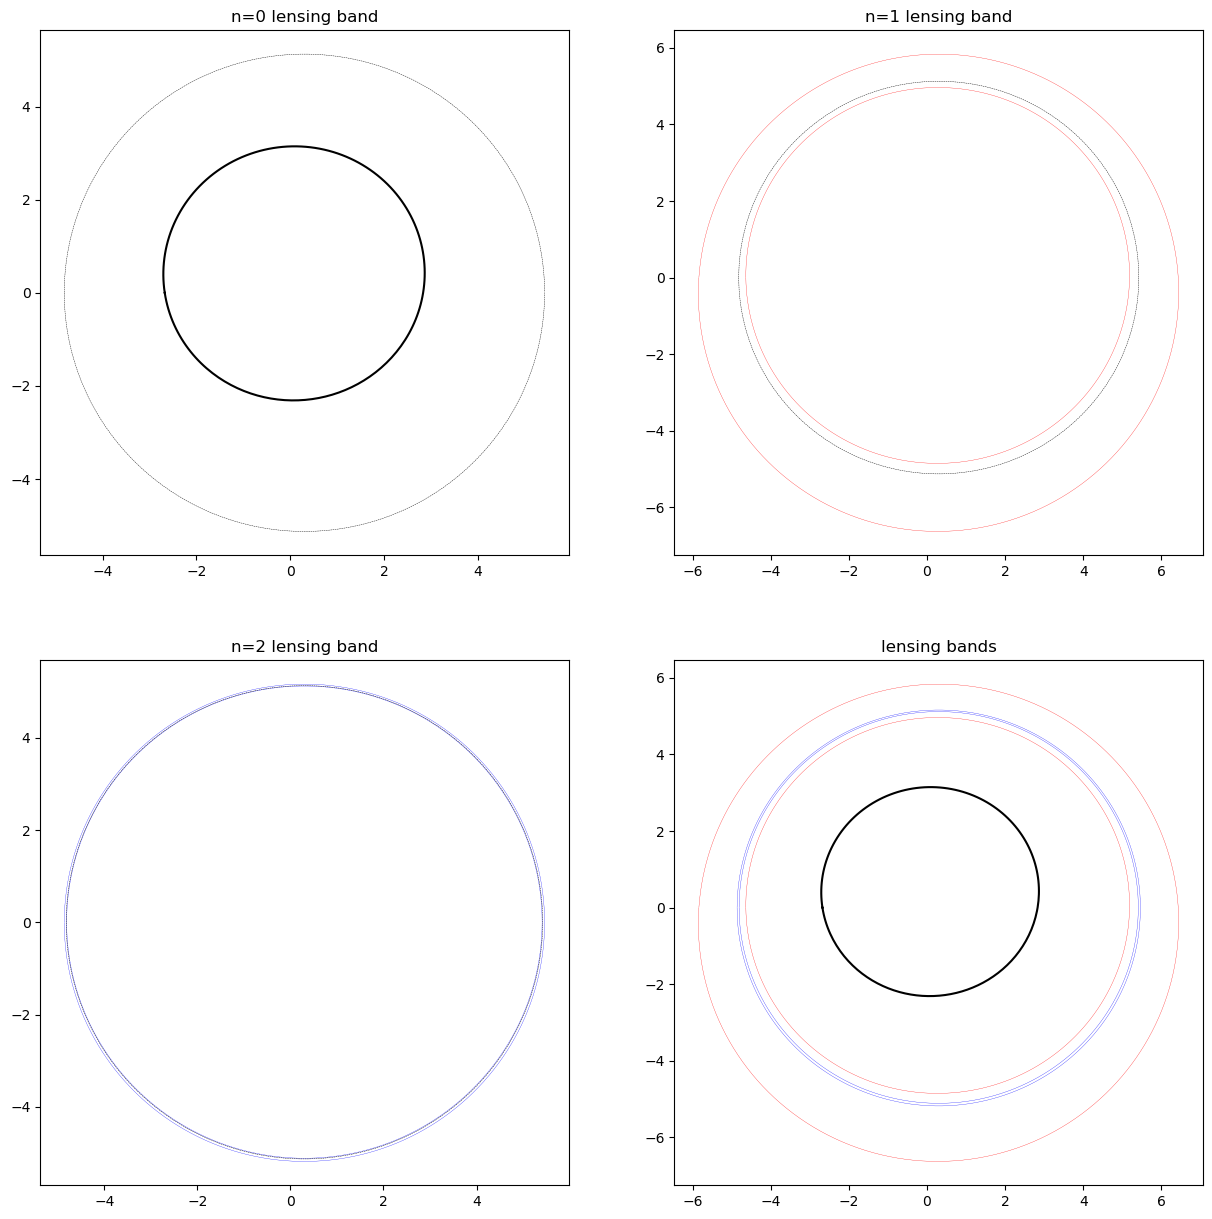

In [13]:
#Las carcasas cóncavas para las lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]


plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.plot(hull_0i[:,0],hull_0i[:,1],color='k')
plt.title('n=0 lensing band')

plt.plot(alpha_critic,beta_critic, color='k',linewidth=0.3,linestyle="--")
plt.plot(alpha_critic,-beta_critic, color='k',linewidth=0.3,linestyle="--")

plt.subplot(2,2,2)
plt.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
plt.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
plt.title('n=1 lensing band')

plt.plot(alpha_critic,beta_critic, color='k',linewidth=0.3,linestyle="--")
plt.plot(alpha_critic,-beta_critic, color='k',linewidth=0.3,linestyle="--")

plt.subplot(2,2,3)
plt.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
plt.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)
plt.title('n=2 lensing band')

plt.plot(alpha_critic,beta_critic, color='k',linewidth=0.3,linestyle="--")
plt.plot(alpha_critic,-beta_critic, color='k',linewidth=0.3,linestyle="--")

plt.subplot(2,2,4)
plt.plot(hull_0i[:,0],hull_0i[:,1],color="k")
plt.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
plt.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
plt.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
plt.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)
plt.title('lensing bands')

plt.show()

#plt.plot(alpha_critic,beta_critic, color='k',linewidth=0.3,linestyle="--")
#plt.plot(alpha_critic,-beta_critic, color='k',linewidth=0.3,linestyle="--")

Note que a medida que $n$ va creciendo, las lensing bands se van confinando en la curva critica de Kerr. Esto muestra que esta curva critica nocorresponde al horizonte de eventos, si no que es una región que determina cual sera el comportamiento de los fotones.


In [15]:
#Puntos de la cuadricula para cada lensing bands
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])

supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])

supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()


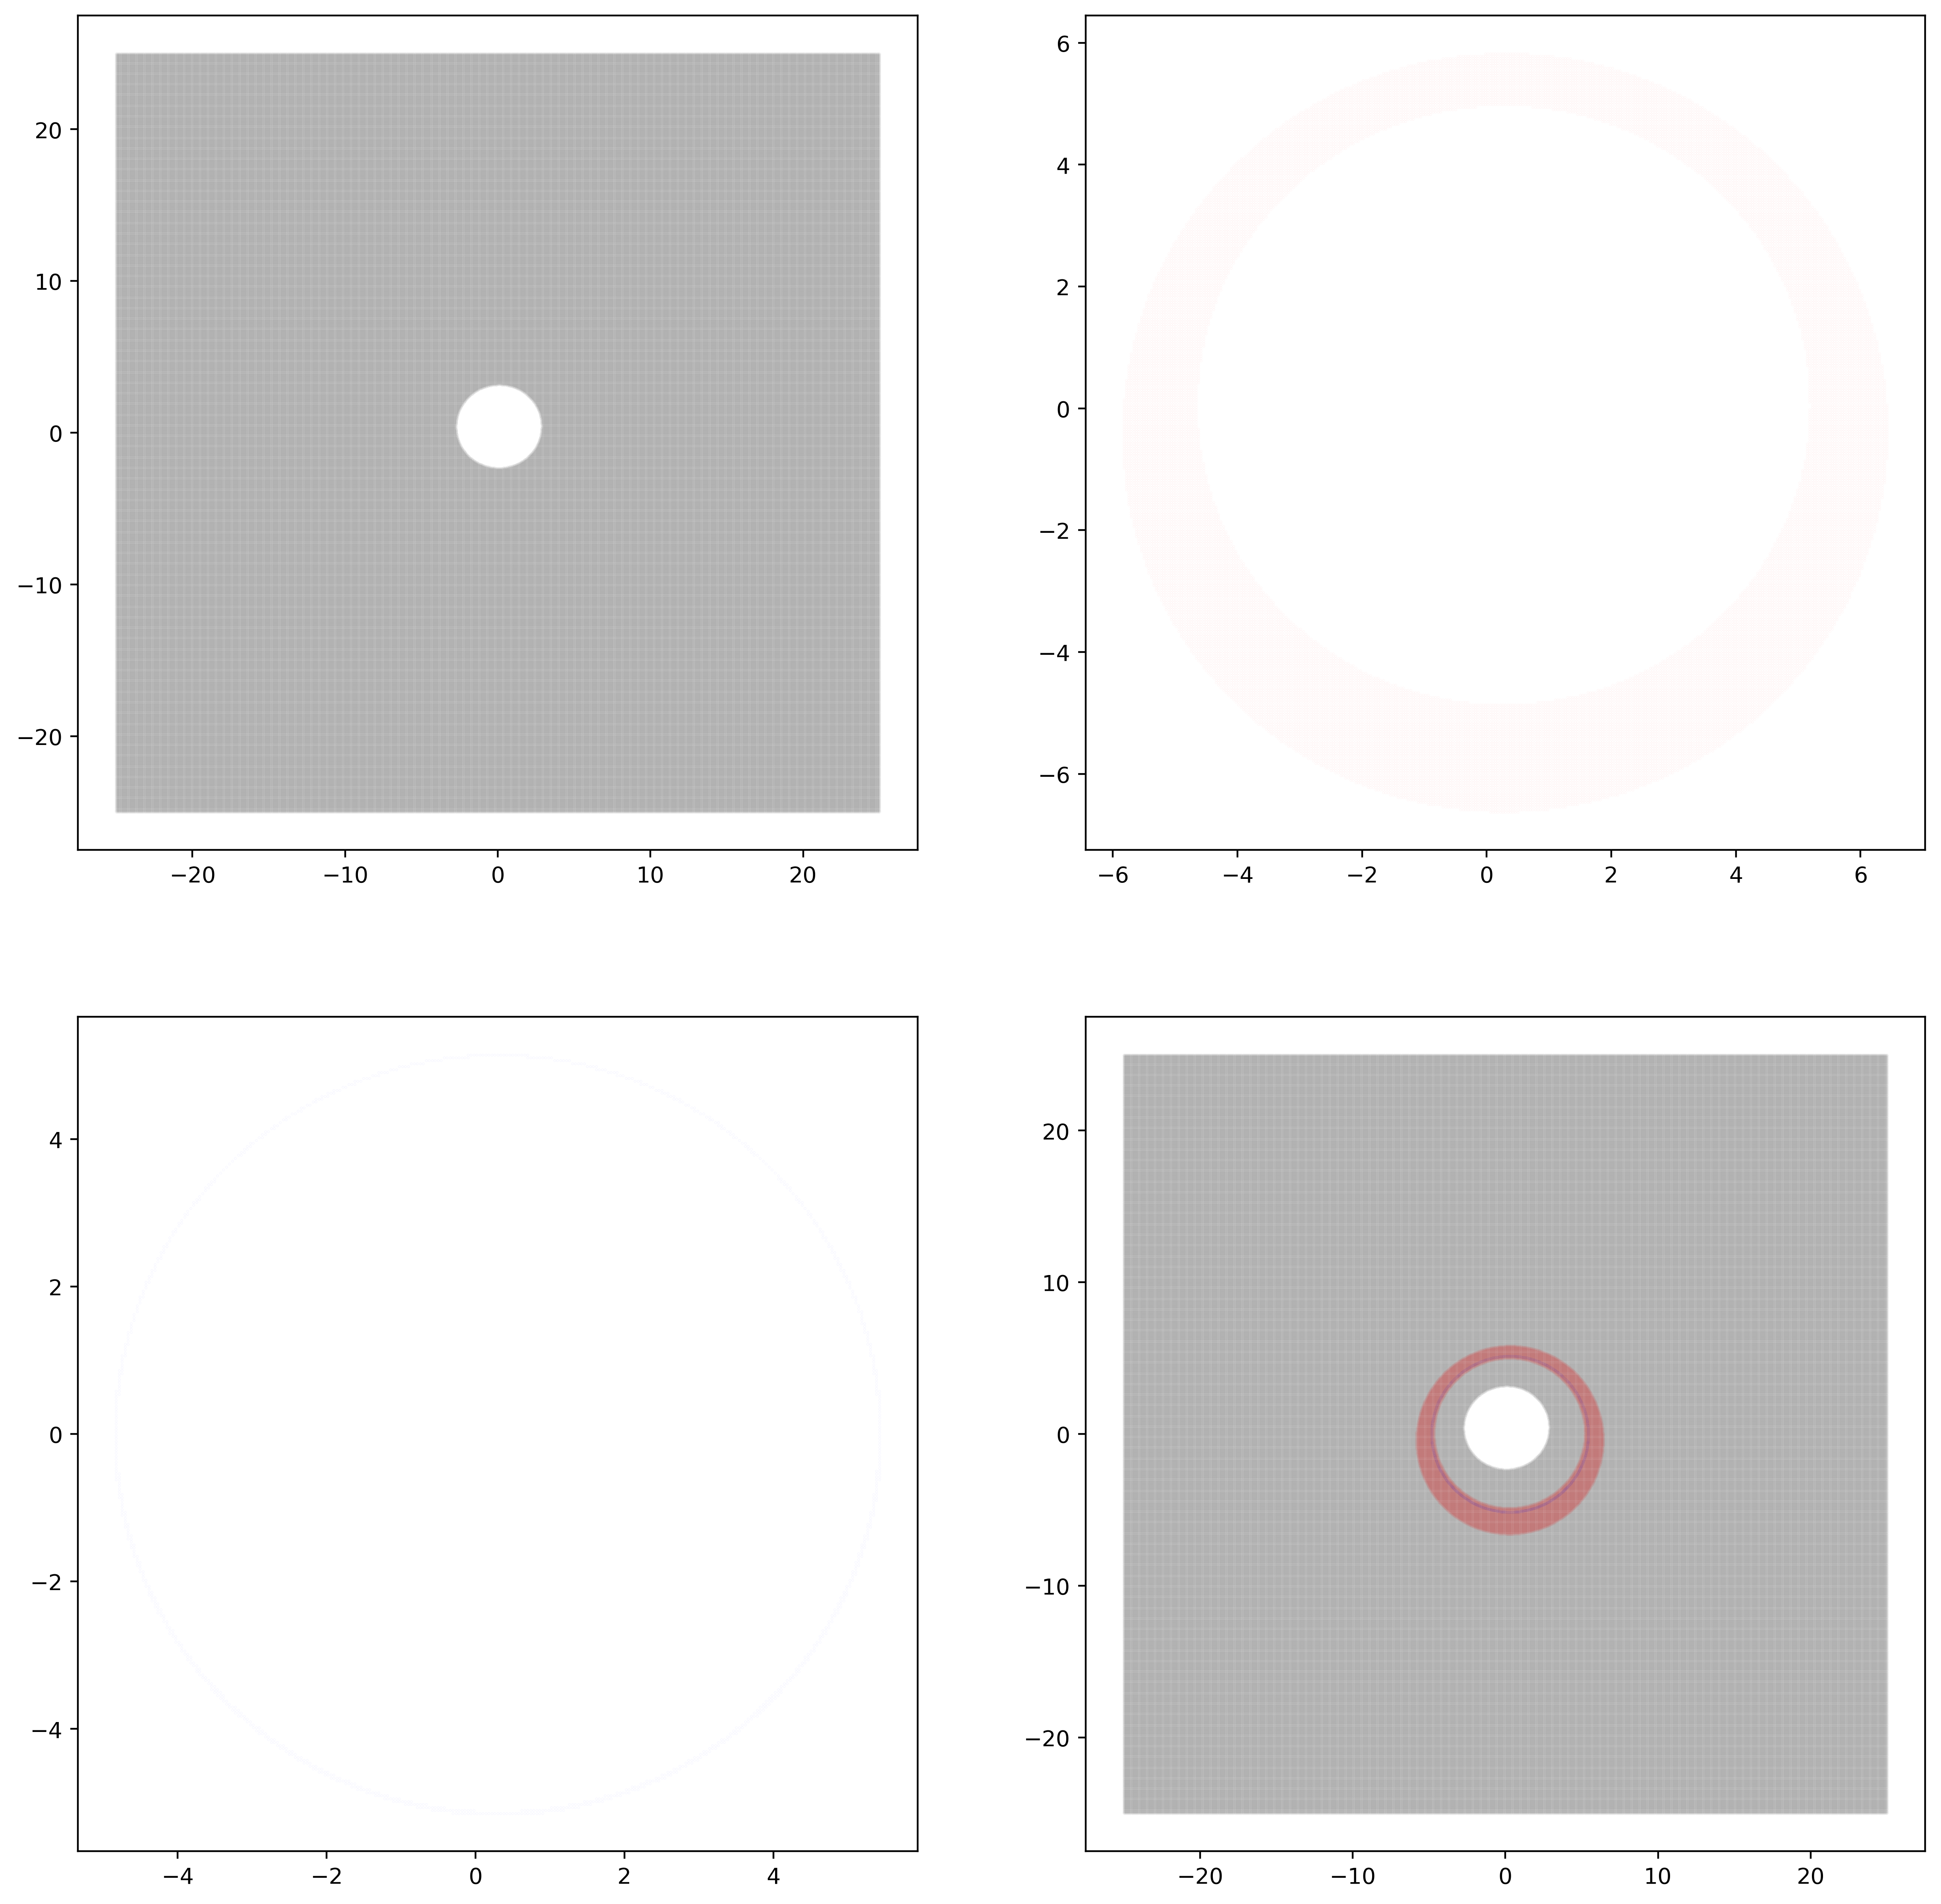

In [19]:
plt.figure(figsize=(15,15),dpi=400)

plt.subplot(2,2,1)
plt.scatter(supergrid0[:,0][mask0],supergrid0[:,1][mask0],color="k",marker=".",
            s=.001,alpha=0.5)

plt.subplot(2,2,2)
plt.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",
            s=.001,alpha=0.5)

plt.subplot(2,2,3)
plt.scatter(supergrid2[:,0][mask2],supergrid2[:,1][mask2],color="b",marker=".",
            s=.001,alpha=0.5)

plt.subplot(2,2,4)
plt.scatter(supergrid0[:,0][mask0],supergrid0[:,1][mask0],color="k",marker=".",
            s=.001,alpha=0.5)
plt.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",
            s=.001,alpha=0.5)
plt.scatter(supergrid2[:,0][mask2],supergrid2[:,1][mask2],color="b",marker=".",
            s=.001,alpha=0.5)

plt.show()

Las variables `supergrid`, `N` y `mask` describen cómo se construye y utiliza una grilla adaptativa para realizar ray tracing eficiente en imágenes de agujeros negros. Estas variables se definen por cada banda de lente gravitacional \( n = 0, 1, 2 \), que corresponde a los diferentes anillos de fotones.

#### `supergrid{n}`

Contiene las coordenadas de los puntos del plano de la imagen donde se lanza ray tracing para reconstruir el anillo \( n \). Cada `supergrid` cubre solo la **región relevante** del plano de la imagen donde se forma el anillo.

#### `N{n}`

Es el número de puntos (o rayos) en `supergrid{n}`. AART mantiene un número **constante de píxeles por banda**, pero los distribuye en regiones **cada vez más pequeñas** para bandas con mayor \( n \), aumentando así la resolución de forma adaptativa.

####  `mask{n}`

Es una máscara que indica qué puntos de `supergrid{n}` **pertenecen realmente** a la banda de lente \( n \). Esto permite filtrar solo los puntos válidos y evitar cálculos innecesarios fuera de la región de interés.




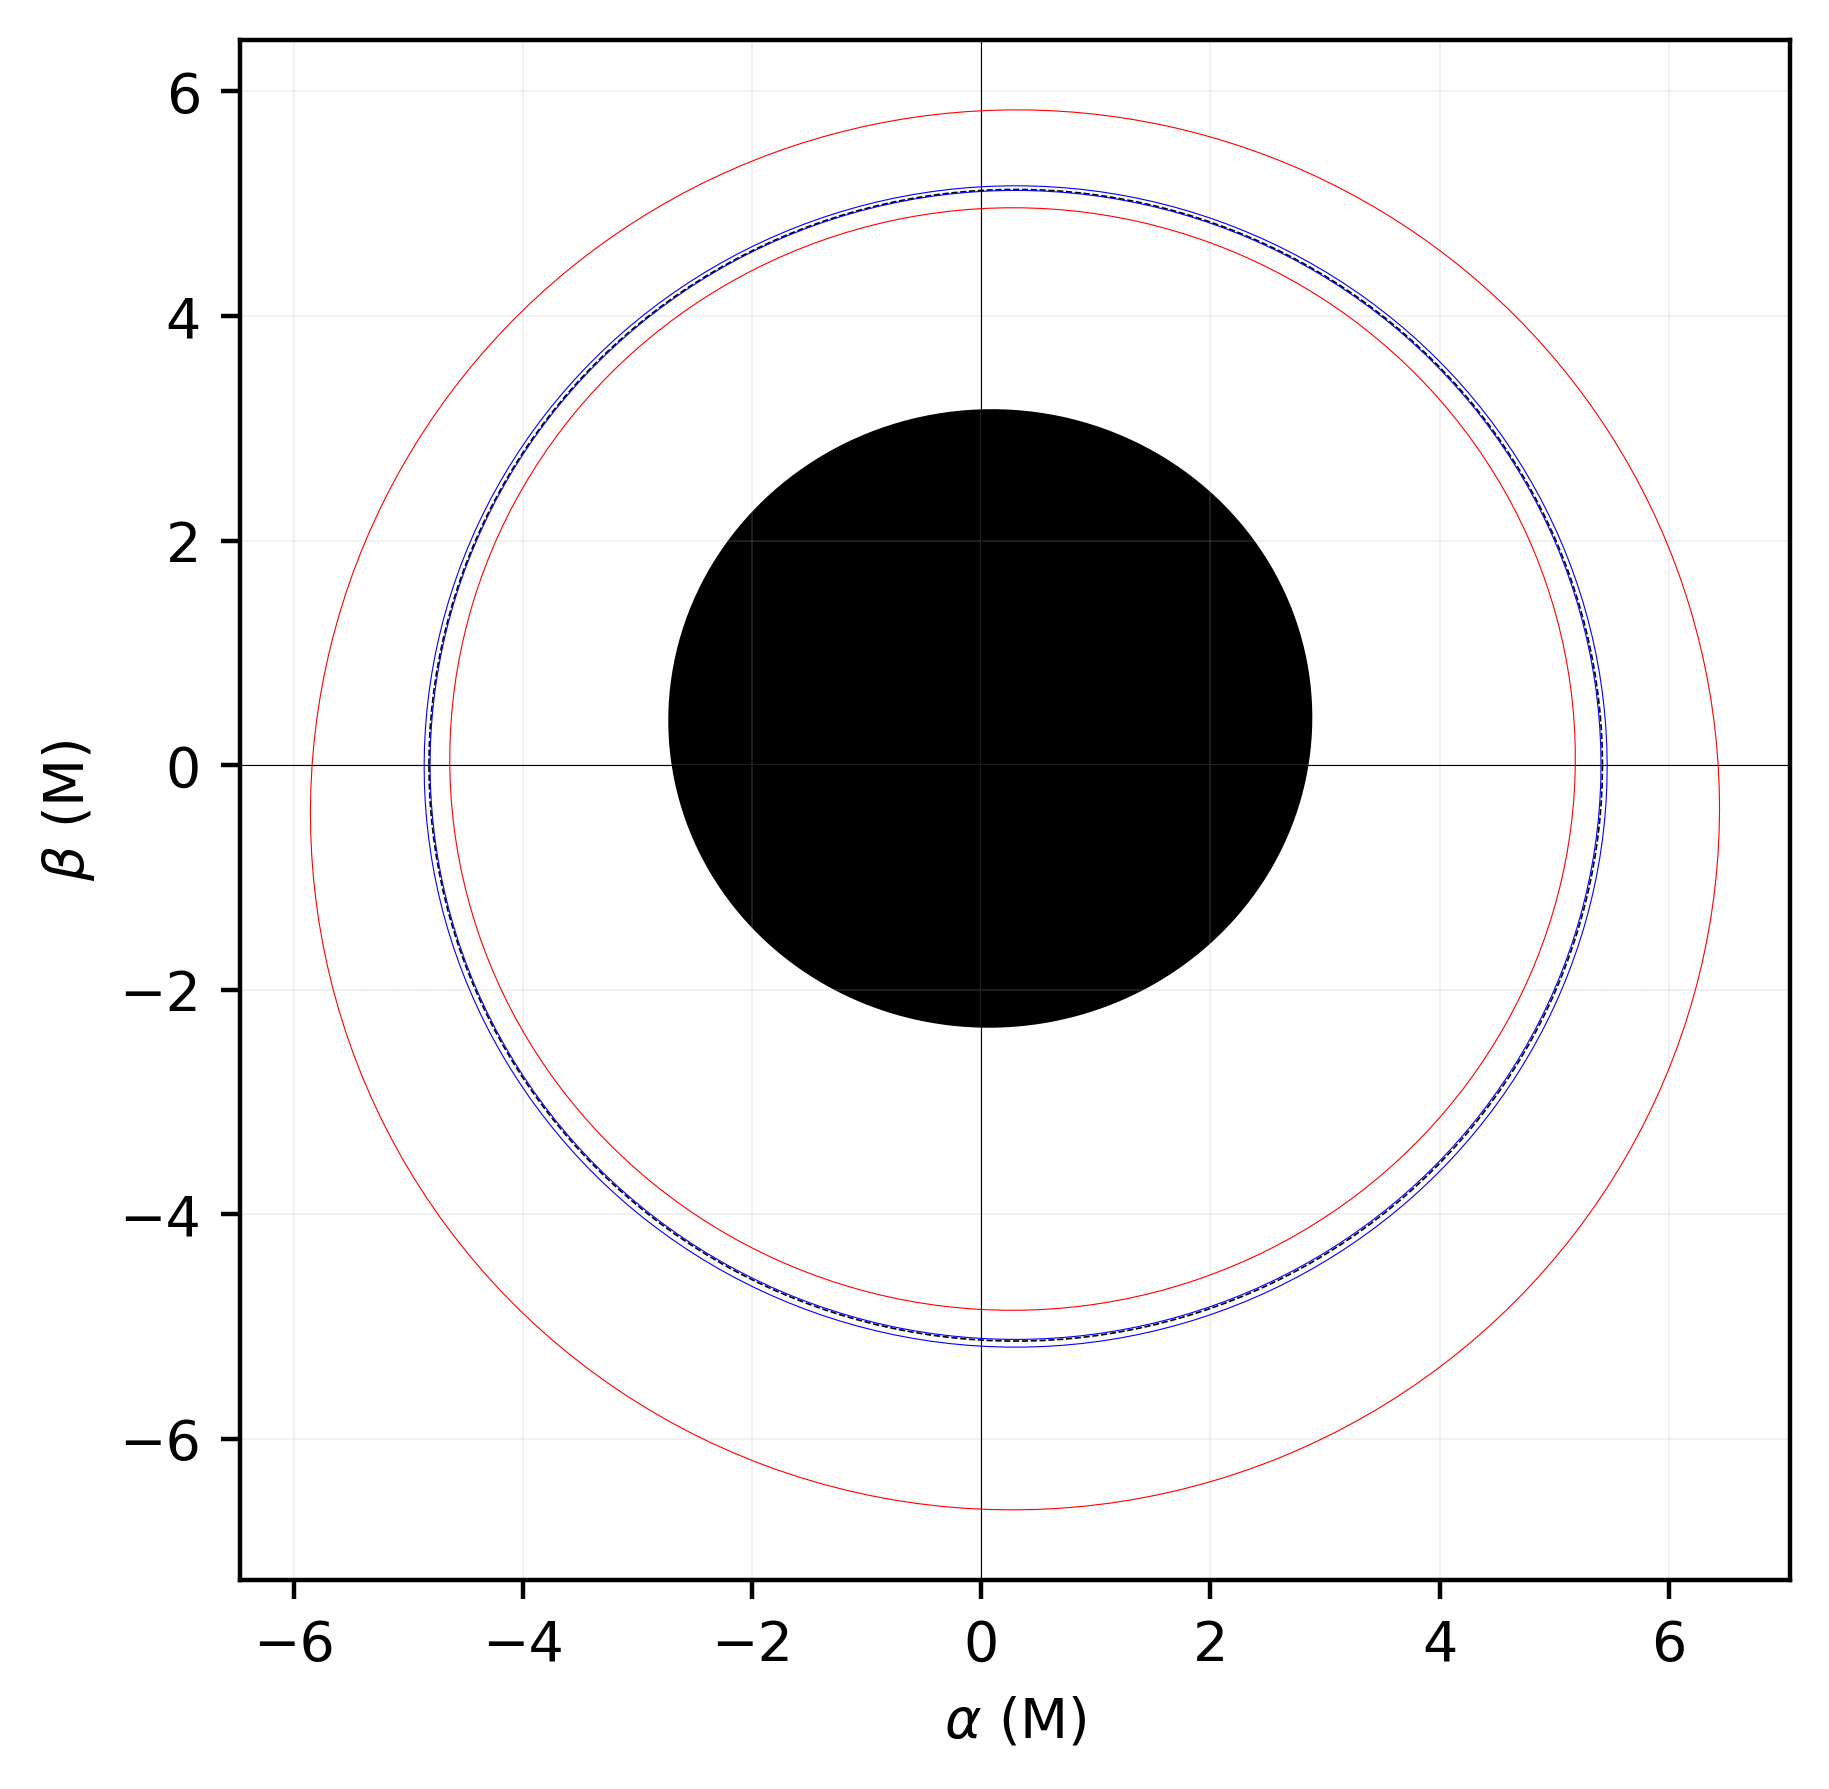

In [17]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)
ax.grid(True, which='both', linewidth=0.3, alpha=0.2)

ax.plot(alpha_critic,beta_critic,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critic,-beta_critic,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k") #Se rellena la sombra del agujero negro
ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
ax.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
ax.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)

#Plotting the grid points of the n=1 lensing band
ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.00001,alpha=0.5)

#ax.set_xlim(-12,12)
#ax.set_ylim(-12,12)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('LB.png',dpi=400,bbox_inches='tight')

plt.show()

## Analytical Ray-tracing
De forma analoga a cuando se encuentran las lensing bands, ahora vamos a utilizar el archivo `raytracing.py` para realizar el trazado de rayos. Es importante recordar que ya se debe tener un archivo donde se tengan identificadas las lensing bands para utilizar este archivo .py.

En este documento se utilizara el .h5 generado en la creación de las lensing bands para reconocer las regiones en donde se debe realizar el trazado de rayos, por este motivo, lo primero que nos devolvera el archivo .py sera la dirección `fnbands` con la cual se encuentra el archivo .h5. 

Del documento .h5 se obtendran el `supergrid` y `mask` con el objetivo de reconocer los puntos del plano imagen donde se debe realizar el trazado de rayos. Recuerde que `supergrid` nos dice cuales son los puntos del plano imagen donde se lanza el ray tracing y `mask` indica que puntos del plano imagen pertenecen realmente a la n-esima lensing band. 

Una vez identificada la lensing band en la que se trabaja y bajo que aproximación se debe trabajar, se utiliza la función `rt` para realizar el ray-tracing.

In [21]:
%time !python raytracing.py


Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  ./Results/LensingBands_a_0.5_i_17.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  ./Results/Rays_a_0.5_i_17.h5  created.

A total of 4687500 photons were ray-traced
CPU times: total: 156 ms
Wall time: 48.2 s


In [23]:
#Cremos la ruta donde se guardaron los datos
fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)
#Imprimimos la dirección donde se encuentran
print("Reading file: ",fnrays)
#Abrimos el archivo para empezar a leerlo
h5f = h5py.File(fnrays,'r')

Reading file:  ./Results/Rays_a_0.5_i_17.h5


In [25]:
#Extraemos toda la información del archivo .h5
rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]

h5f.close()

Ahora que hemos extraida todas las coordenadas por donde se realiza el ray-tracing, hacemos un plot de los resultados

Text(0, 0.5, '$\\beta$ (M)')

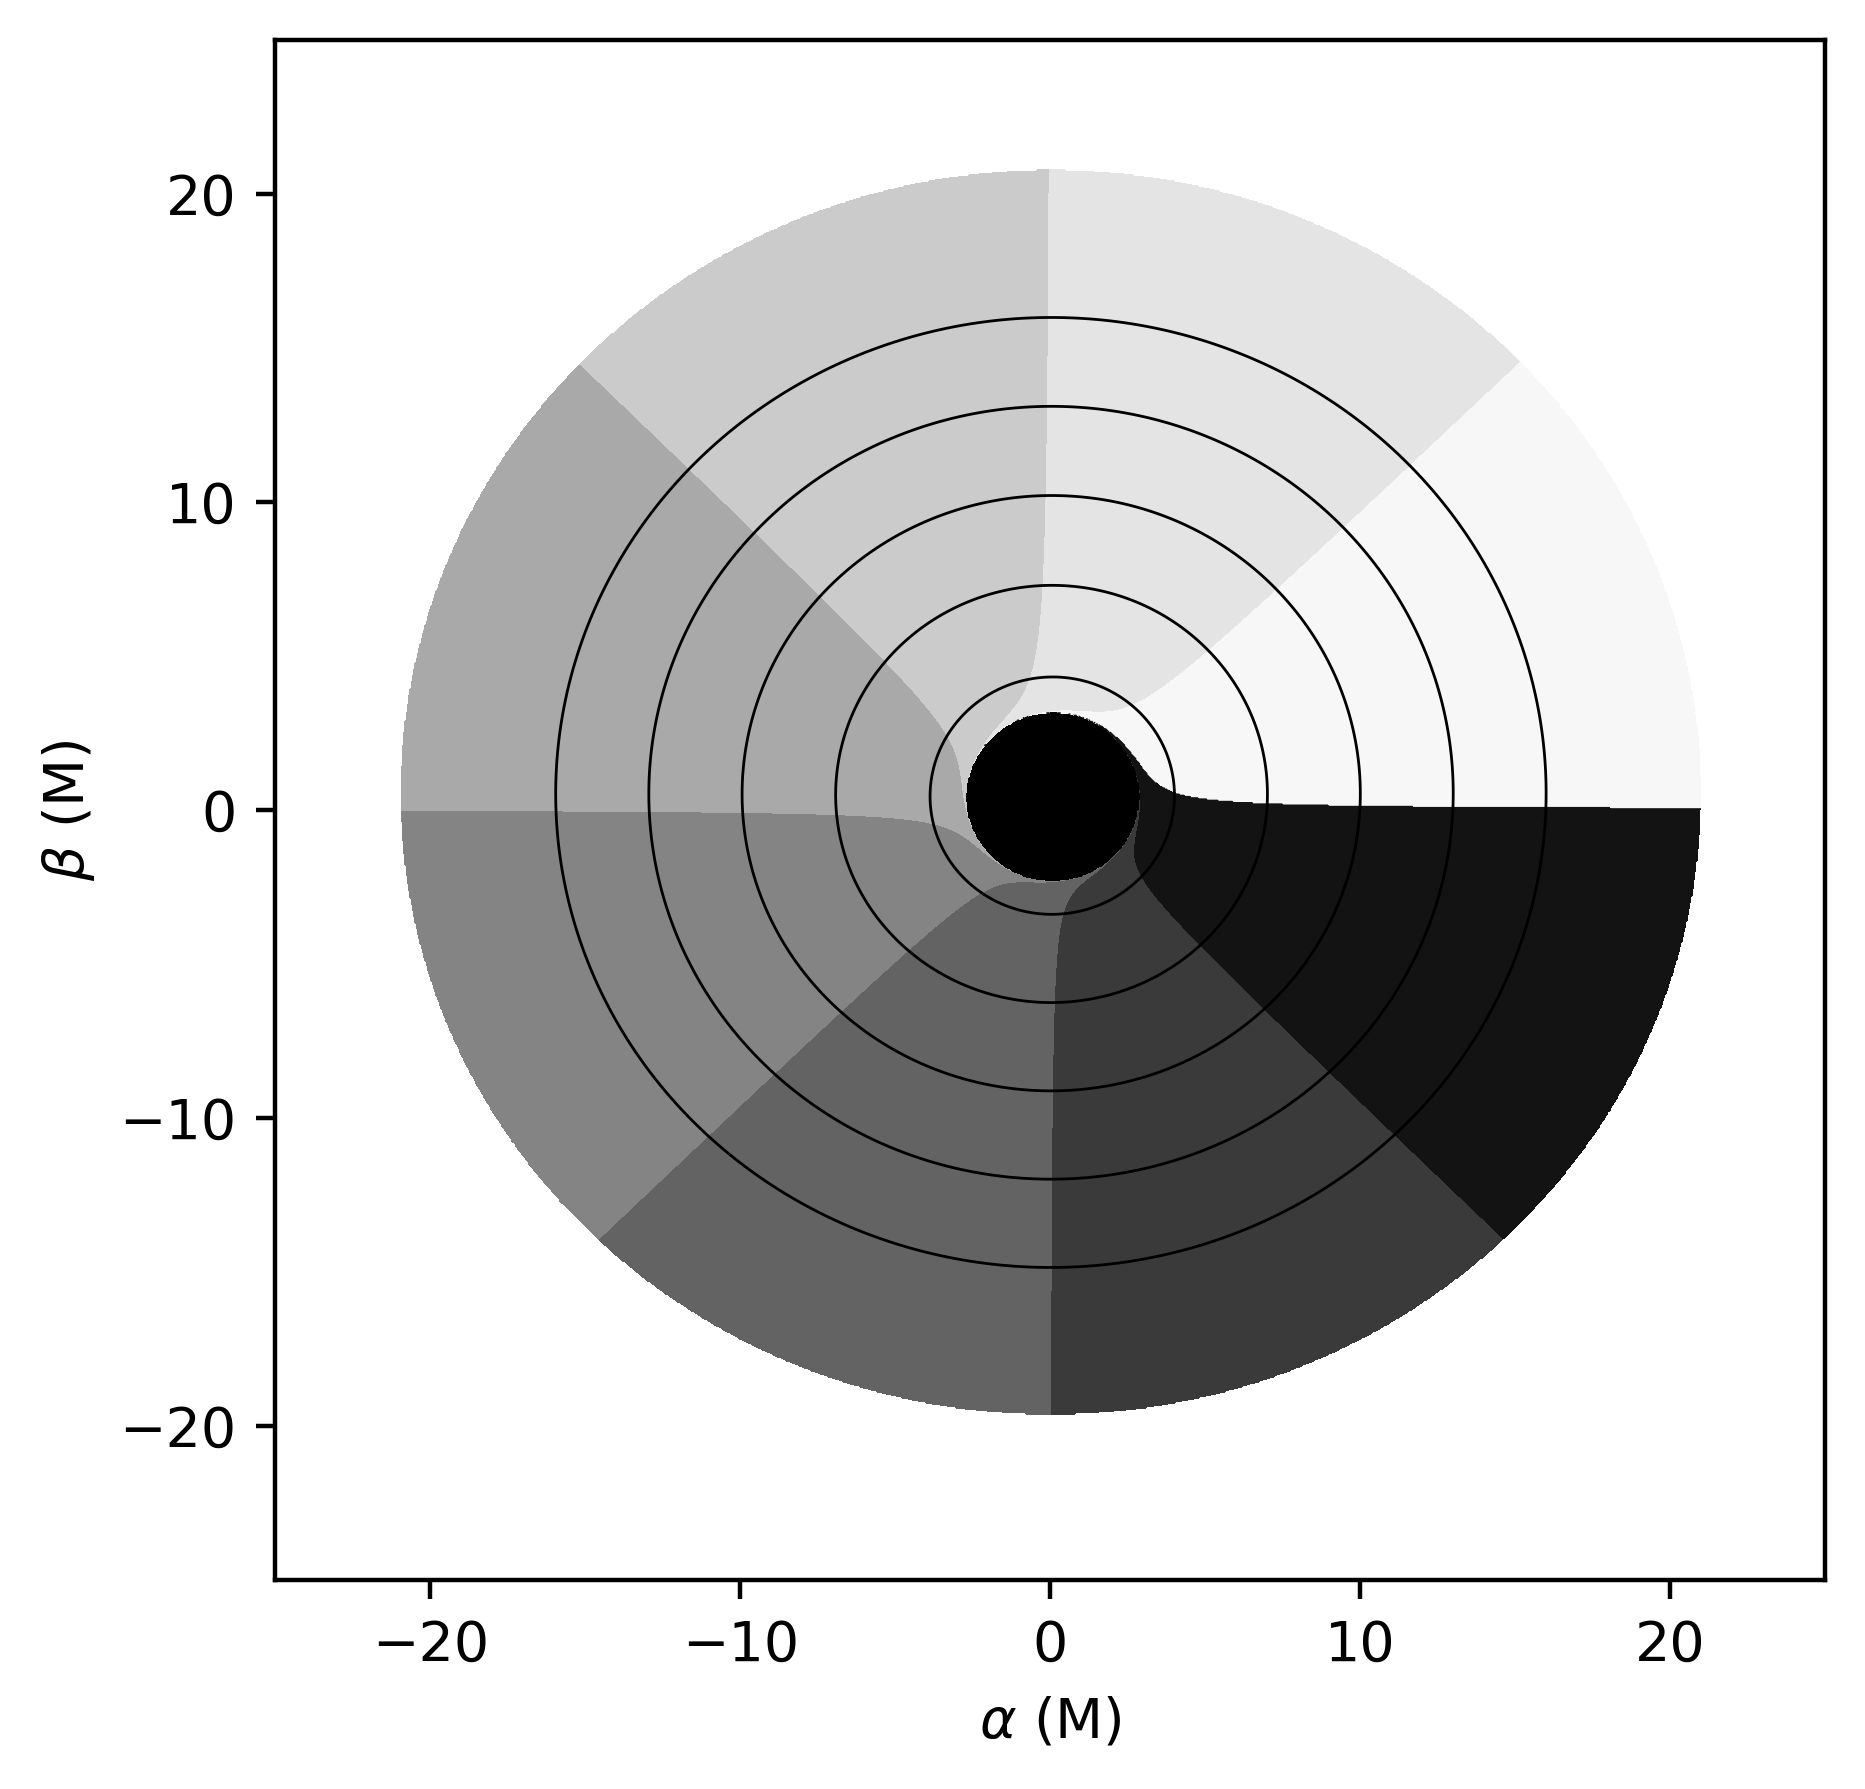

In [27]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

##hull_0i dice cual es la region que se debe rellenar ya que se cruza el horizonte de eventos
ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)

#Coordenadas polares de la imagen, se cambia el color cada 45 grados
CSphi=ax.contourf(phi0.reshape(N0,N0).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim0,lim0,-lim0,lim0],origin="lower")
#Coordenadas radiales de la imagen (boyer-Lindquist radius), r_{\rm s}=3,6,9,12,15,20 
CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('Rays.png',dpi=400,bbox_inches='tight')

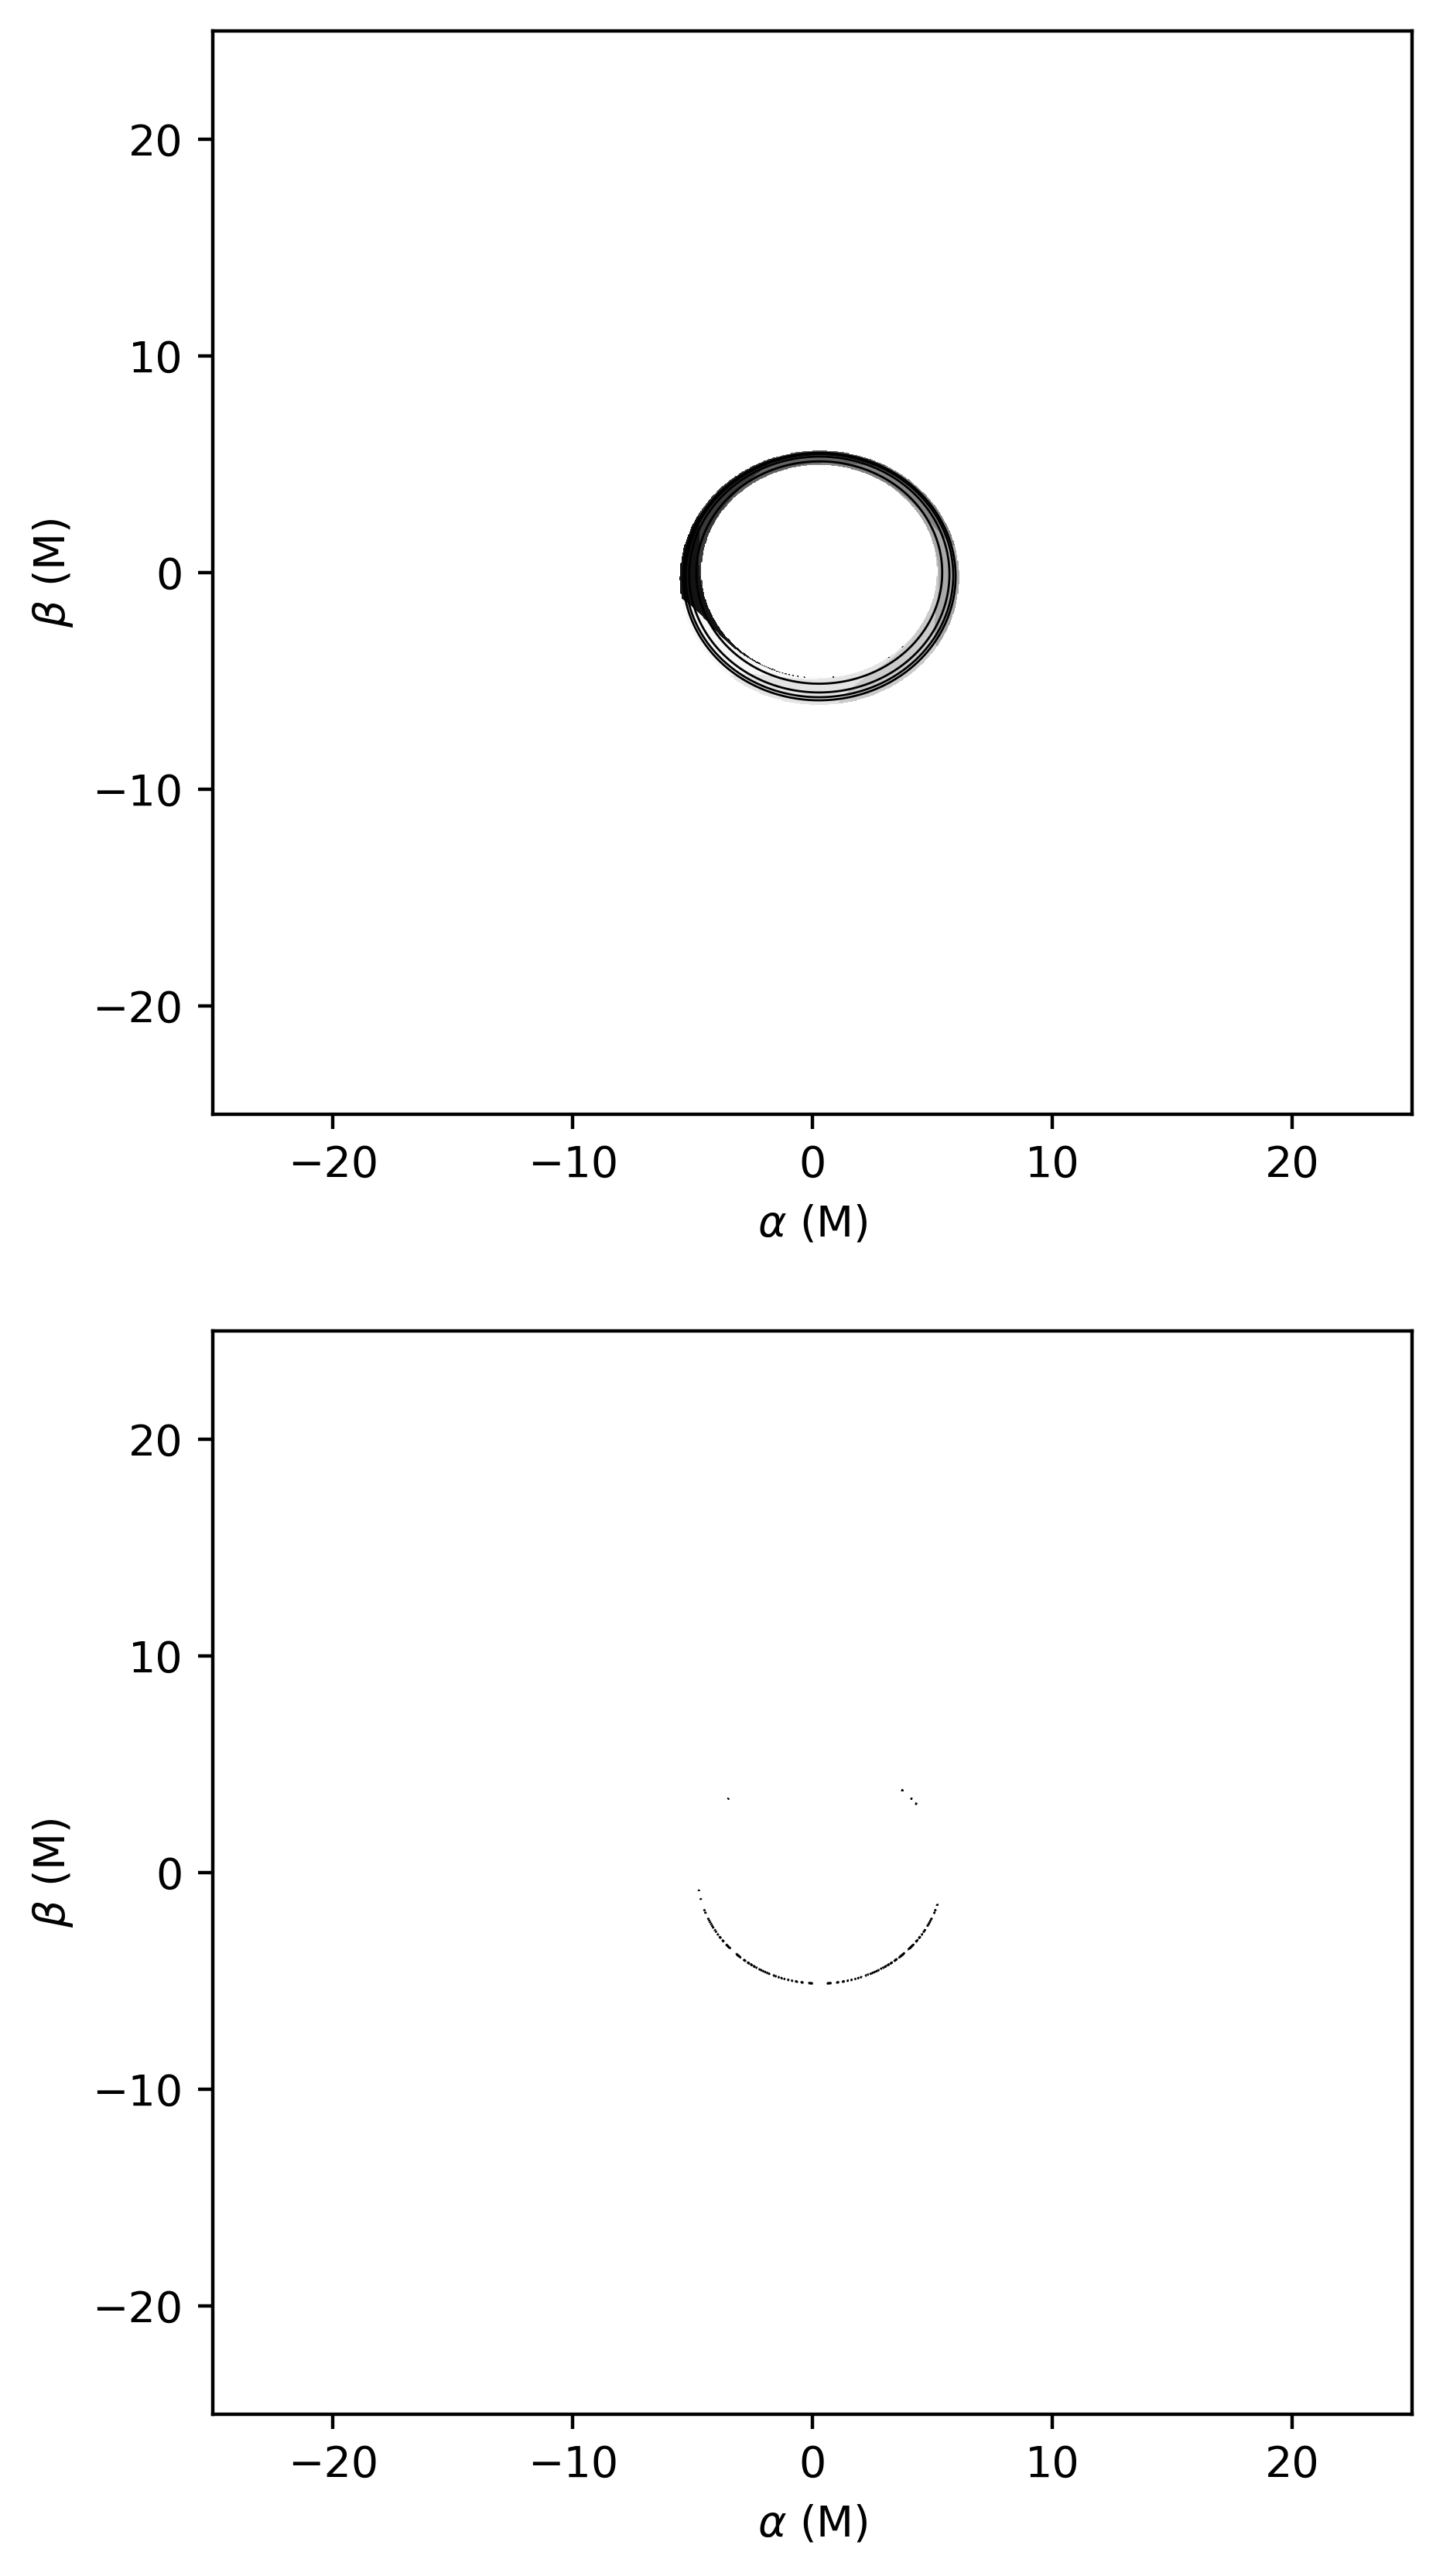

In [29]:
plt.figure(figsize=(5,10),dpi=400)
#n=1
plt.subplot(2,1,1)
#plt.fill(hull_1i[:,0],hull_1i[:,1],color="k",linewidth=1,zorder=0)
plt.contourf(phi1.reshape(N1,N1).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim1,lim1,-lim1,lim1],origin="lower")
plt.contour(rs1.reshape(N1,N1).T,levels=[3,6,9,12],extent=[-lim1,lim1,-lim1,lim1],origin="lower",linewidths=0.5,colors='k')
plt.xlim(-lim1,lim1)
plt.ylim(-lim1,lim1)
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")


#n=2
plt.subplot(2,1,2)
#plt.fill(hull_2i[:,0],hull_2i[:,1],color="k",linewidth=1,zorder=0)
plt.contourf(phi2.reshape(N2,N2).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim2,lim2,-lim2,lim2],origin="lower")
plt.contour(rs2.reshape(N2,N2).T,levels=[3,6],extent=[-lim2,lim2,-lim2,lim2],origin="lower",linewidths=0.5,colors='k')
plt.xlim(-lim2,lim2)
plt.ylim(-lim2,lim2)
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")

plt.show()

In [17]:
print(f'el archivo {fnbands} contiene los siguentes directorios: \n', list(h5f.keys()))

el archivo ./Results/LensingBands_a_0.94_i_7.h5 contiene los siguentes directorios: 
 ['phi0', 'phi1', 'phi2', 'rs0', 'rs1', 'rs2', 'sign0', 'sign1', 'sign2', 't0', 't1', 't2']


### n=0

In [31]:
r_o = 10000
t_renorm_0 = t0 - r_o + 2*np.log(r_o)
alpha = supergrid0[:, 0]
beta = supergrid0[:, 1]

valid_mask = np.isfinite(t_renorm_0)
alpha = alpha[valid_mask]
beta = beta[valid_mask]
t_renorm_0 = t_renorm_0[valid_mask]
#t_renorm_0 = (t_renorm_0 - np.mean(t_renorm_0)) / np.std(t_renorm_0)


In [33]:
Q1 = np.percentile(t_renorm_0, 25)
Q3 = np.percentile(t_renorm_0, 75)
IQR = Q3 - Q1
rango = np.max(t_renorm_0) - np.min(t_renorm_0)

# Calcular el número de bins usando la regla de Freedman-Diaconis
N = len(t_renorm_0)
bins_freedman_diaconis = int(np.ceil(rango / (2 * IQR) * N**(1/3)))
bins_freedman_diaconis

283

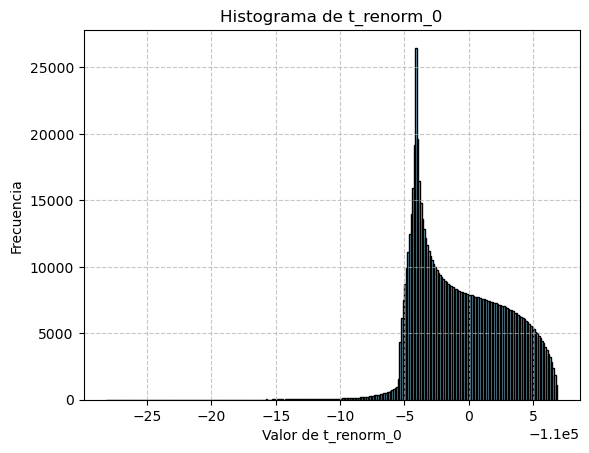

In [35]:
# Crear el histograma
plt.hist(t_renorm_0, bins=bins_freedman_diaconis,  color='skyblue', edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas
plt.xlabel('Valor de t_renorm_0')
plt.ylabel('Frecuencia')
plt.title('Histograma de t_renorm_0')

# Mostrar la gráfica
plt.show()

In [37]:
minV = 0.5
maxV = 99.95
Tmin, Tmax = np.percentile(t_renorm_0, [minV,maxV])
print(np.min(t_renorm_0),np.max(t_renorm_0))
print(Tmin,Tmax)

-110028.16359259677 -109993.14539623007
-110007.57910529085 -109993.2090389043


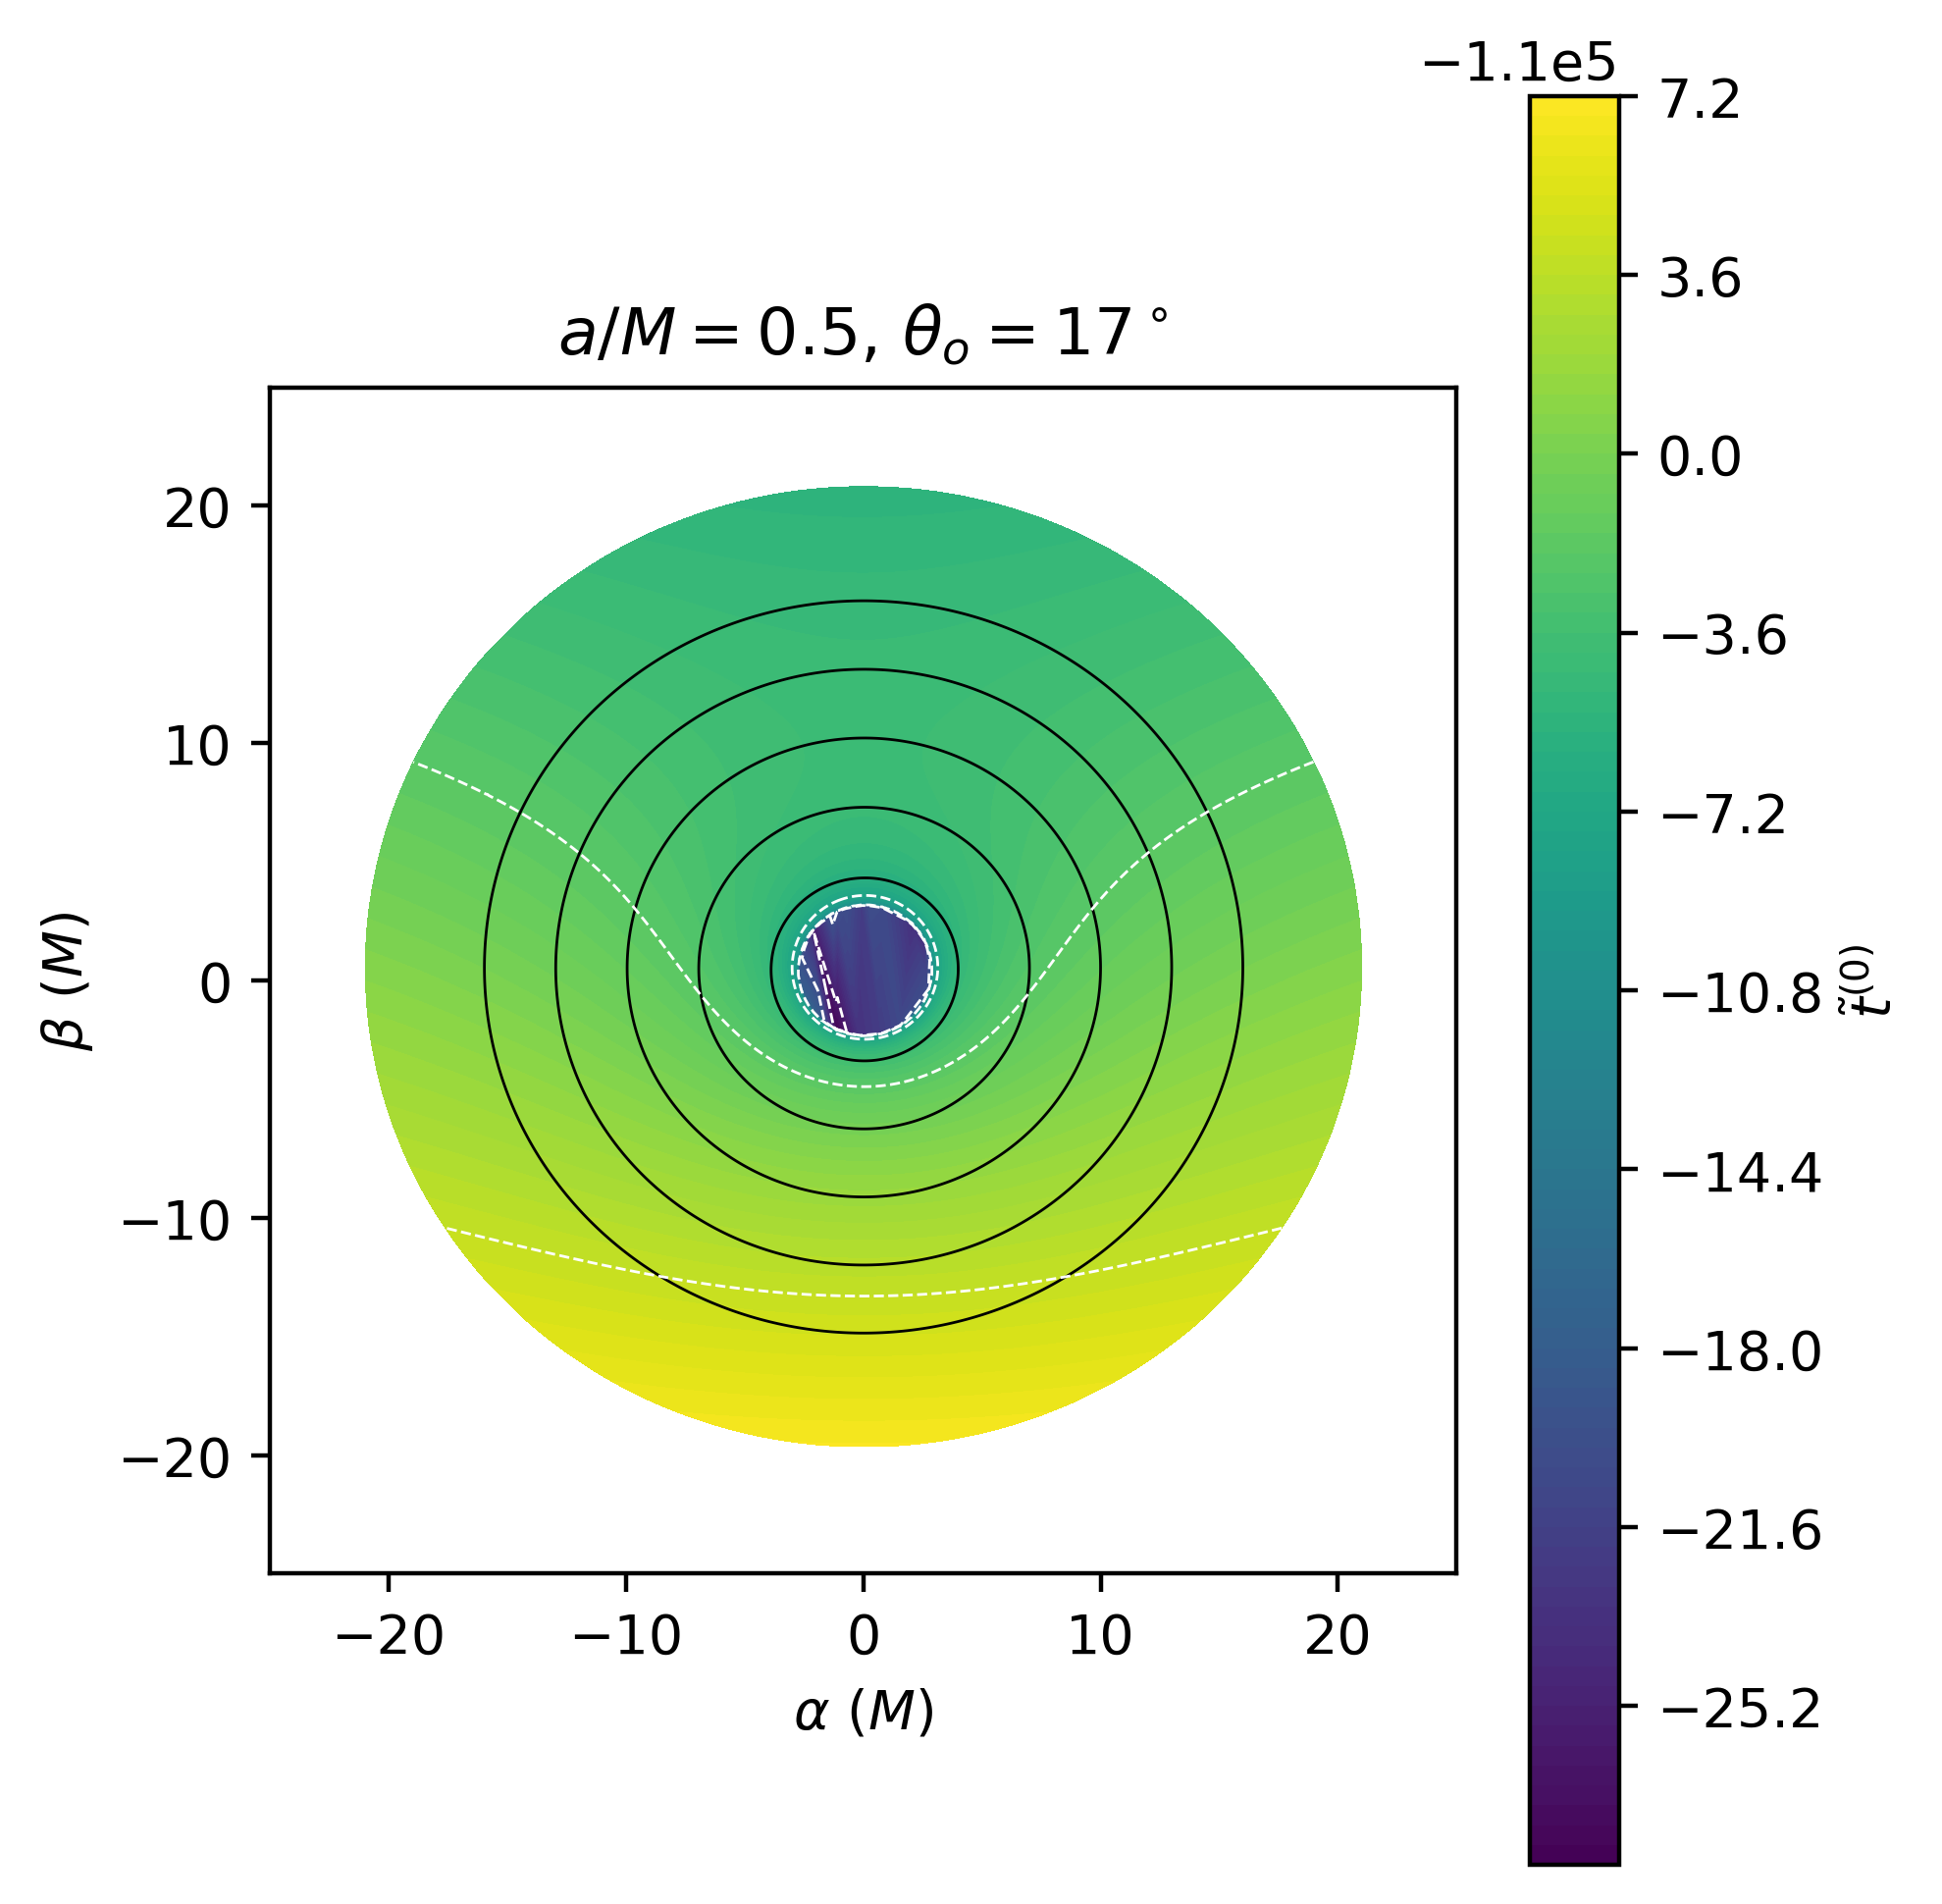

In [45]:
# Graficar
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

#Coordenadas radiales de la imagen (boyer-Lindquist radius), r_{\rm s}=3,6,9,12,15,20 
CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

sc = ax.tricontourf(alpha, beta, t_renorm_0, levels=100, cmap="viridis")

# Opcional: añadir curvas iso-tiempo
contours = ax.tricontour(alpha, beta, t_renorm_0, levels=5, colors='white', linewidths=0.5)

##hull_0i dice cual es la region que se debe rellenar ya que se cruza el horizonte de eventos
#ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)

ax.set_aspect('equal')
ax.set_xlabel(r"$\alpha\ (M)$")
ax.set_ylabel(r"$\beta\ (M)$")
fig.colorbar(sc, ax=ax, label=r"$\tilde{t}^{(0)}$")
plt.title(rf"$a/M = {spin_case}$, $\theta_o = {i_case}^\circ$")
plt.tight_layout()
#plt.savefig(f'TimeVisualitation_{spin_case}_{i_case}.png',dpi=400,bbox_inches='tight')
plt.show()

### n=1

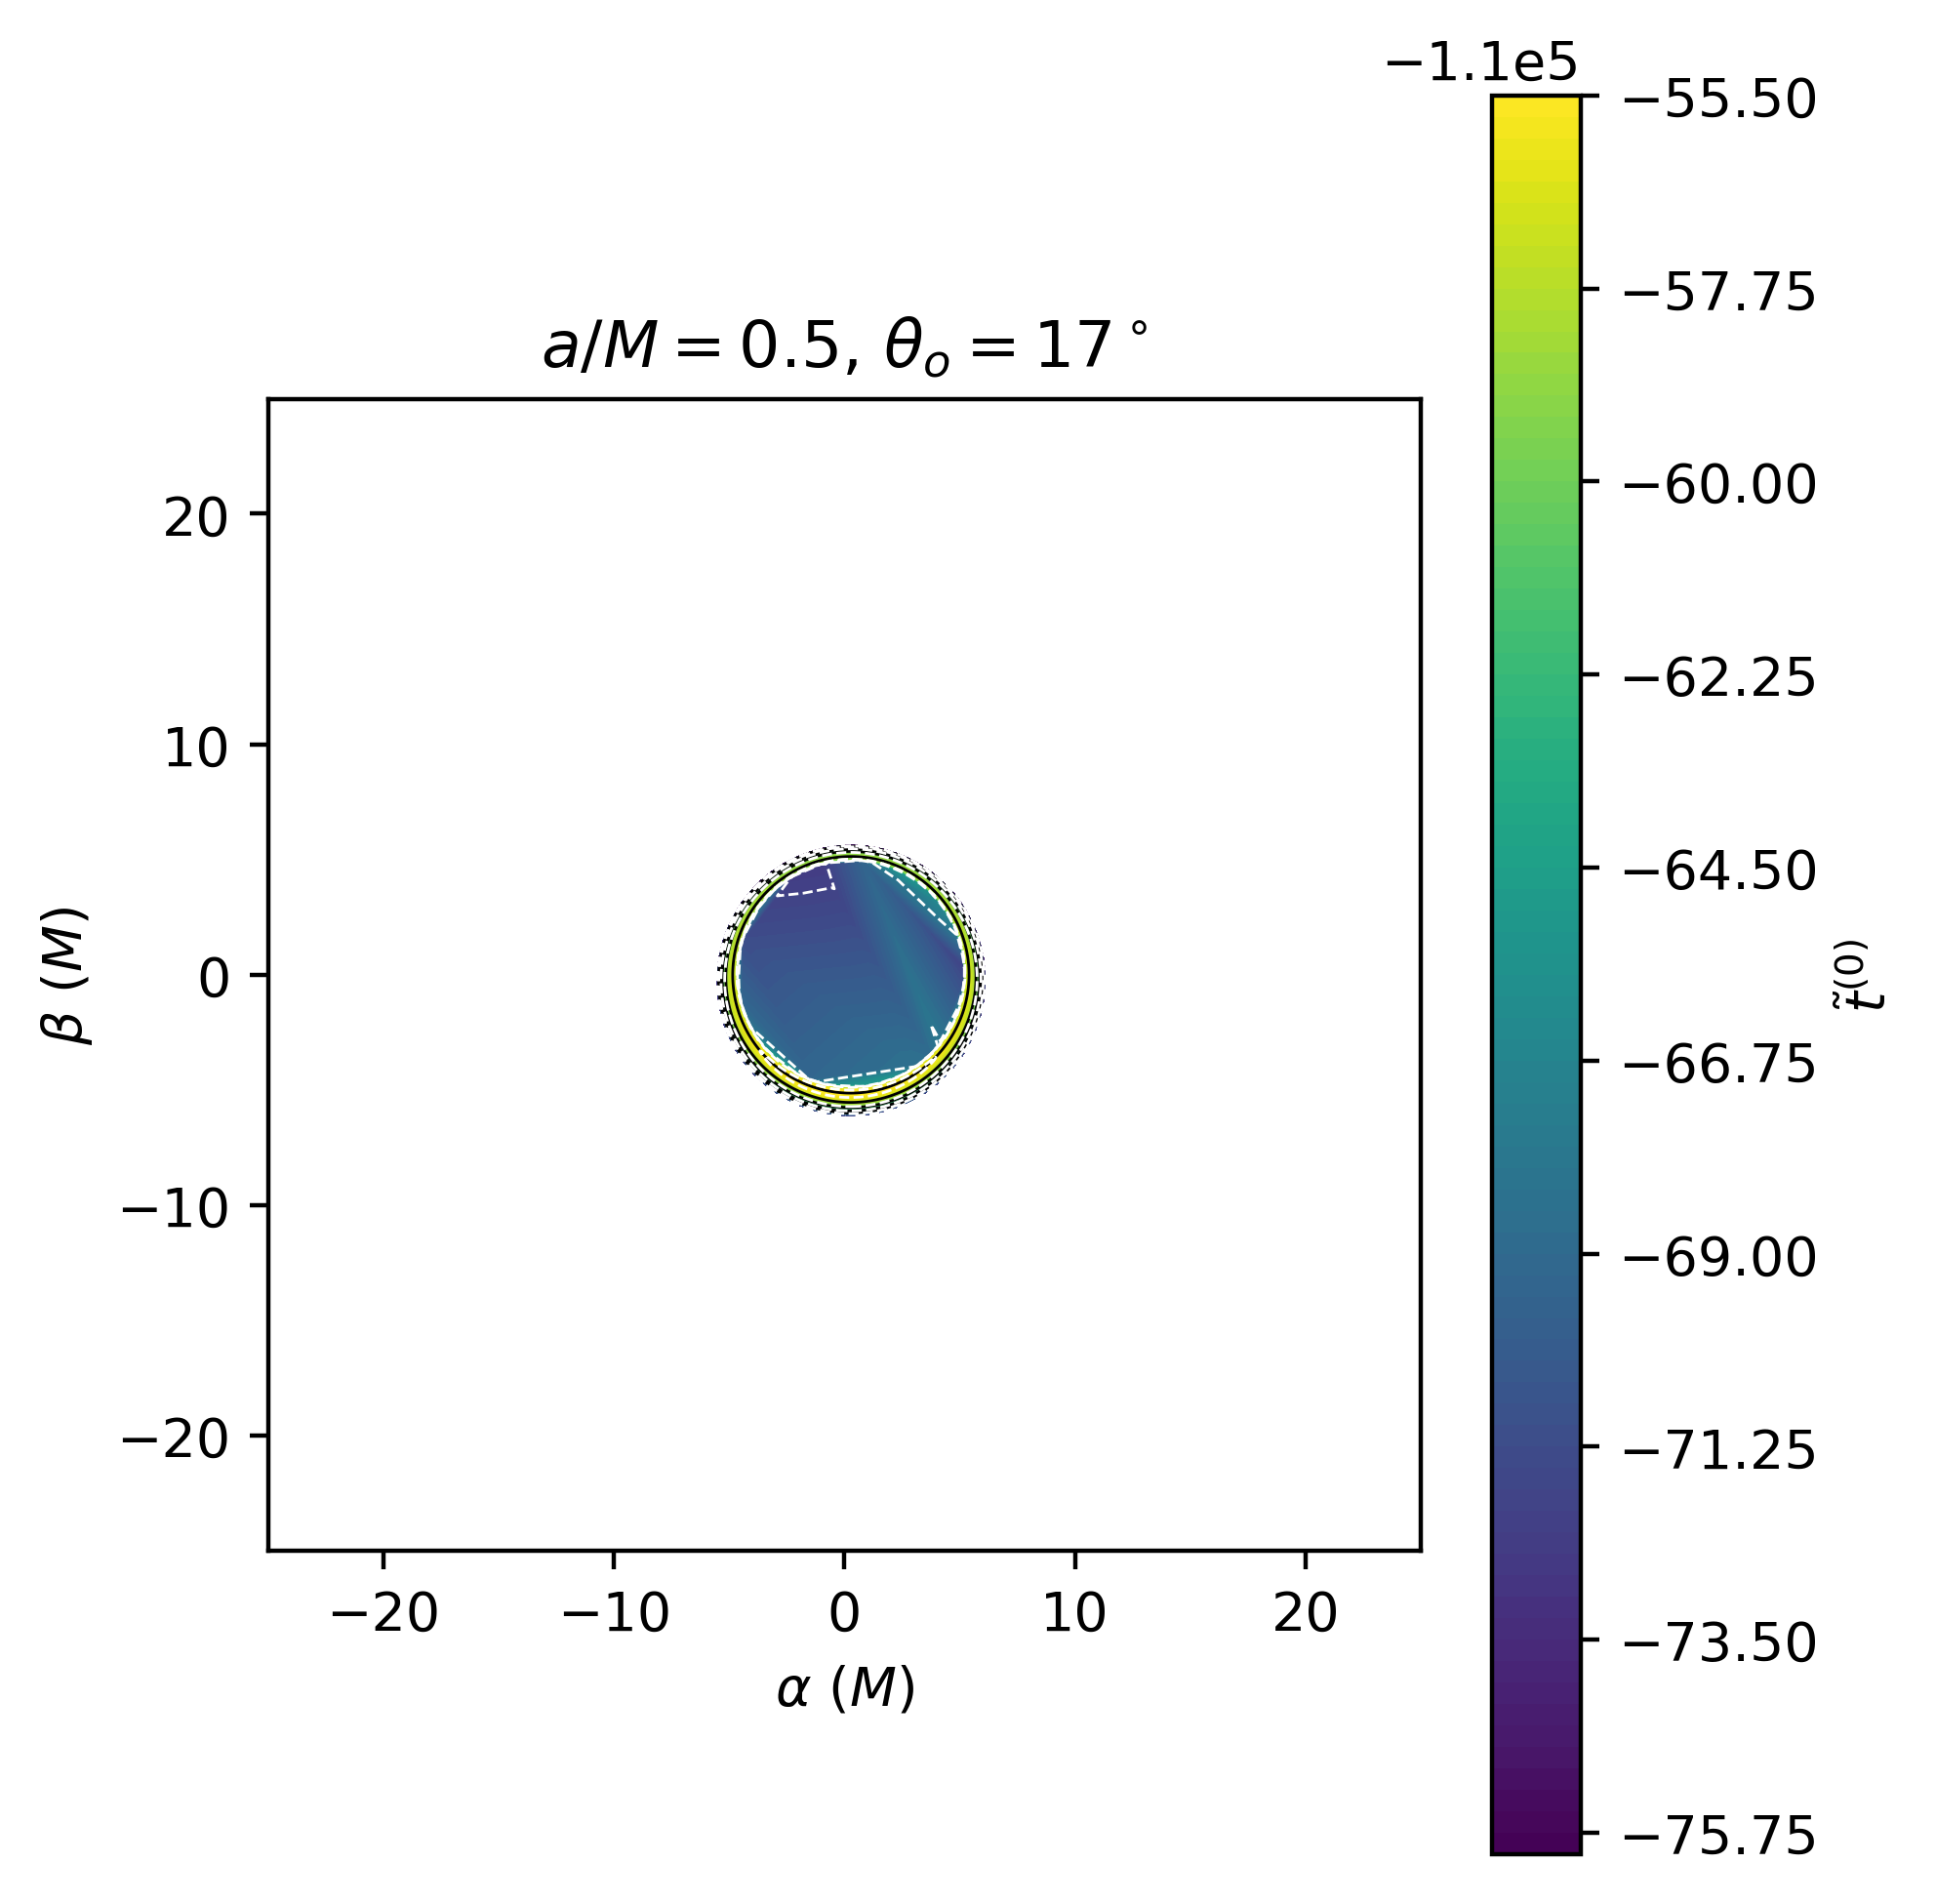

In [43]:
r_o = 10000
t_renorm_1 = t1 - r_o - 2*np.log(r_o)
alpha1 = supergrid1[:, 0]
beta1 = supergrid1[:, 1]

valid_mask = np.isfinite(t_renorm_1)
alpha1 = alpha1[valid_mask]
beta1 = beta1[valid_mask]
t_renorm_1 = t_renorm_1[valid_mask]

# Graficar
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

#Coordenadas radiales de la imagen (boyer-Lindquist radius), r_{\rm s}=3,6,9,12,15,20 
CSr=ax.contour(rs1.reshape(N1,N1).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

sc = ax.tricontourf(alpha1, beta1, t_renorm_1, levels=100, cmap="viridis")

# Opcional: añadir curvas iso-tiempo
contours = ax.tricontour(alpha1, beta1, t_renorm_1, levels=5, colors='white', linewidths=0.5)

##hull_0i dice cual es la region que se debe rellenar ya que se cruza el horizonte de eventos
ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)

ax.set_aspect('equal')
ax.set_xlabel(r"$\alpha\ (M)$")
ax.set_ylabel(r"$\beta\ (M)$")
fig.colorbar(sc, ax=ax, label=r"$\tilde{t}^{(0)}$")
plt.title(rf"$a/M = {spin_case}$, $\theta_o = {i_case}^\circ$")
plt.tight_layout()
plt.savefig(f'TimeVisualitation_n1_{spin_case}_{i_case}.png',dpi=400,bbox_inches='tight')
plt.show()

## Computo de las imagenes
Note que hasta el momento solo se han hecho caclulos geometricos sobre el agujero negro, por lo que ahora es posible implementar perfiles de iluminación y obtener una imagen del agujero negro.

Empezamos corriendo el archivo `radialintensity.py`, de donde utilizamos `br_vb` para hacer el calculo de la intensidad en las regiones donde ya se realizo el ray-tracing analogo en el proceso realizado para el ray-tracing. 

In [27]:
%time !python radialintensity.py


Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Intensity
Reading file:  ./Results/LensingBands_a_0.5_i_17.h5
Reading file:  ./Results/Rays_a_0.5_i_17.h5
File  ./Results/Intensity_a_0.5_i_17.h5  created.
CPU times: total: 78.1 ms
Wall time: 13.6 s


In [3]:
#Dirección donde se encuentra la información 
fnintensity="./Results/Intensity_a_%s_i_%s.h5"%(spin_case,i_case)
print("Reading file: ",fnintensity)

#Se abre el archivo 
h5f = h5py.File(fnintensity,'r')

#Se extraen las peliculas de intesidad 
I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]



Reading file:  ./Results/Intensity_a_0.5_i_80.h5


In [19]:
print(f'el archivo {fnintensity} contiene los siguentes directorios: \n', list(h5f.keys()))
#Cierre del documento
h5f.close()

el archivo ./Results/Intensity_a_0.5_i_17.h5 contiene los siguentes directorios: 
 ['bghts0', 'bghts1', 'bghts2']


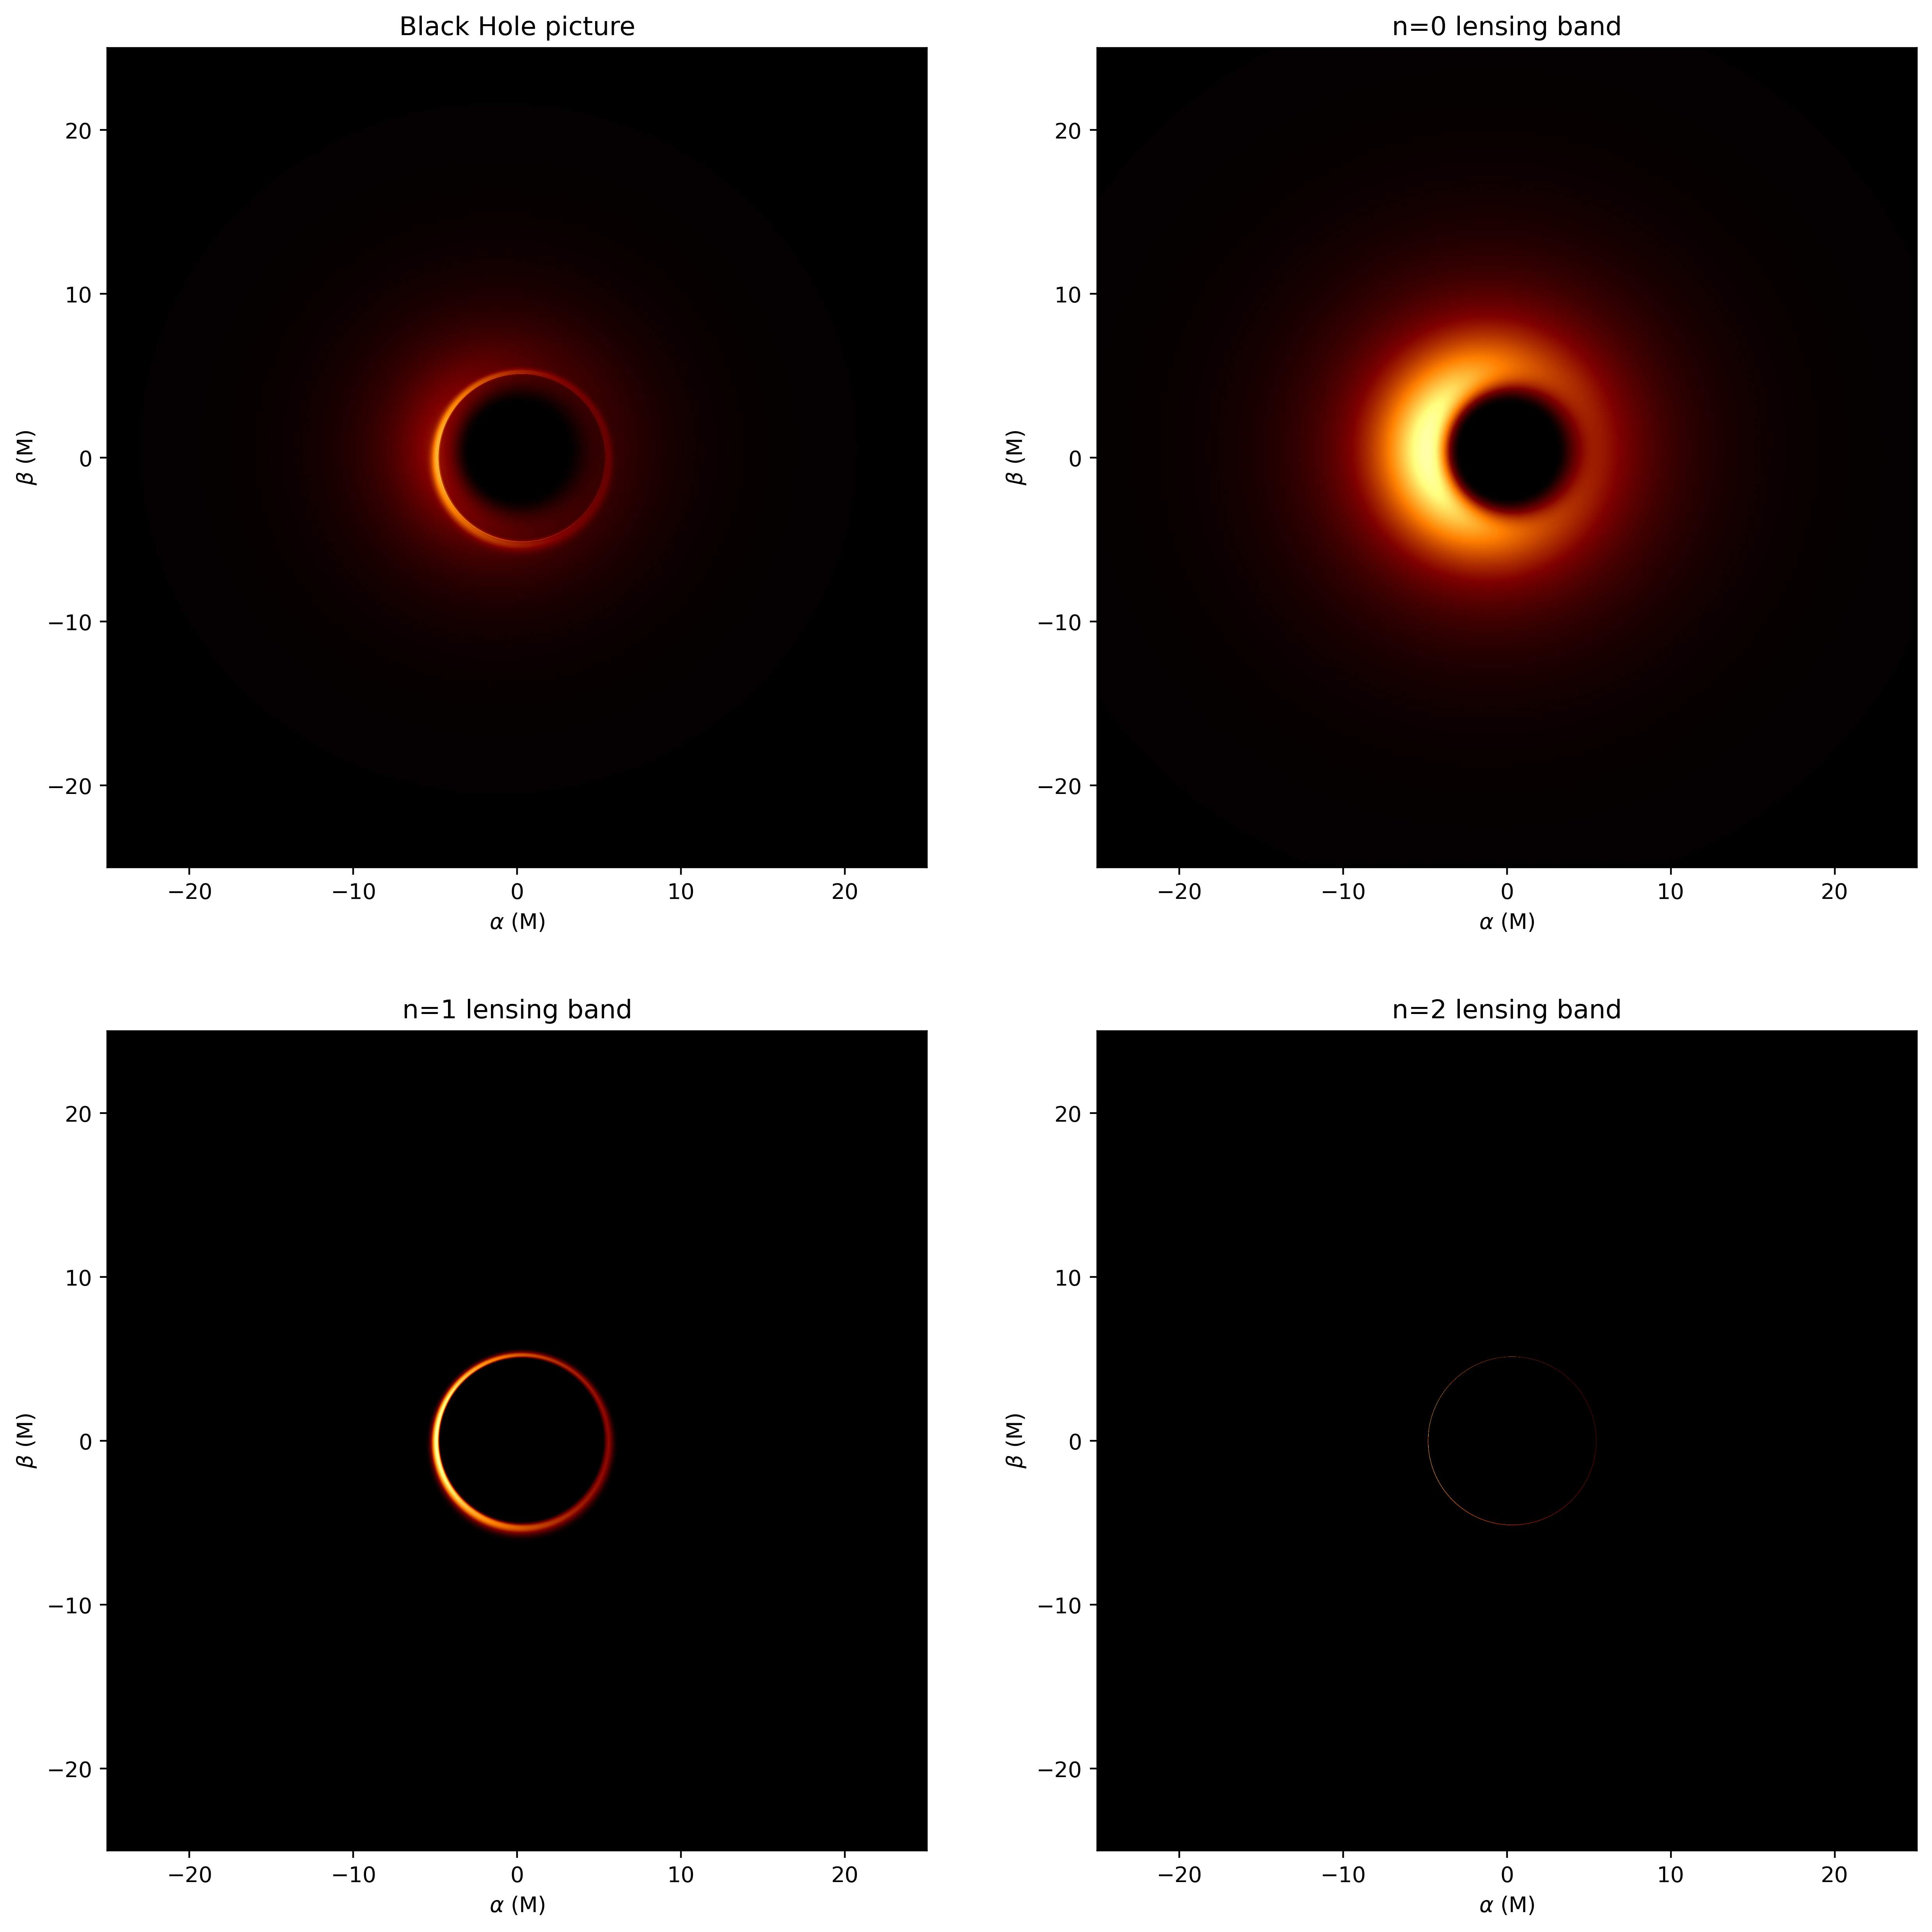

In [33]:
plt.figure(figsize=(15,15),dpi=400)

#Imagen completa
plt.subplot(2,2,1)
#Se muestra el perfil de intensidades 
plt.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#plt.xlim(-10,10)
#plt.ylim(-10,10)
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.title('Black Hole picture')

#n=0
plt.subplot(2,2,2)
#Se muestra el perfil de intensidades 
plt.imshow(I0,vmax=np.max(I0)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#plt.xlim(-10,10)
#plt.ylim(-10,10)
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.title('n=0 lensing band')

#n=1
plt.subplot(2,2,3)
#Se muestra el perfil de intensidades 
plt.imshow(I1,vmax=np.max(I1)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#plt.xlim(-10,10)
#plt.ylim(-10,10)
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.title('n=1 lensing band')

#n=2
plt.subplot(2,2,4)
#Se muestra el perfil de intensidades 
plt.imshow(I2,vmax=np.max(I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#plt.xlim(-10,10)
#plt.ylim(-10,10)
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.title('n=2 lensing band')

plt.show()

## Computo de la amplitud de visibilidad
Se empieza por correr el documento ``visamp.pu``, en donde se obtiene la información de las lensing bands y de las intensidades en cada banda, para posteriormente utilizar el modulo ``visamp_f.py`` del cual se utiliza la función ``radon_cut`` la cual se encarga de la obtención de la amplitud de visibilidad. 
Lo que nos devuelve esto seran multiples documentos .h5 para distintos angulos de radon al momento de aplicar la transformada de radon.

In [35]:
%time !python visamp.py

CPU times: total: 62.5 ms
Wall time: 7.28 s

Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Visamp
Reading file:  ./Results/LensingBands_a_0.5_i_17.h5
Reading file:  ./Results/Intensity_a_0.5_i_17.h5
File  ./Results/Visamp_0_a_0.5_i_17_0.h5  created.
File  ./Results/Visamp_90_a_0.5_i_17_0.h5  created.


In [37]:
#Frecuencias 
freqss = []
#Amplitud de Visibilidad
visamps = []
for i in range(len(radonangles)):
    #leemos el documento para el angulo de radon i
    fnvisamp="./Results/Visamp_%s_a_%s_i_%s_0.h5"%(radonangles[i],spin_case,i_case)

    print("Reading file: ",fnvisamp)

    
    h5f = h5py.File(fnvisamp,'r')
    print(f'el archivo {fnvisamp} contiene los siguentes directorios: \n', list(h5f.keys()))

    #Se obtienen los datos de frecuencias y de amplitud de visibilidad 
    freqs=h5f['freqs'][:]
    visamp=h5f['visamp'][:]

    h5f.close()
    #Se guarda lo obtenido y se repite para el siguiente angulo
    freqss.append(freqs)
    visamps.append(visamp)
    
freqss=np.array(freqss)
visamps=np.array(visamps)

Reading file:  ./Results/Visamp_0_a_0.5_i_17_0.h5
el archivo ./Results/Visamp_0_a_0.5_i_17_0.h5 contiene los siguentes directorios: 
 ['freqs', 'visamp']
Reading file:  ./Results/Visamp_90_a_0.5_i_17_0.h5
el archivo ./Results/Visamp_90_a_0.5_i_17_0.h5 contiene los siguentes directorios: 
 ['freqs', 'visamp']


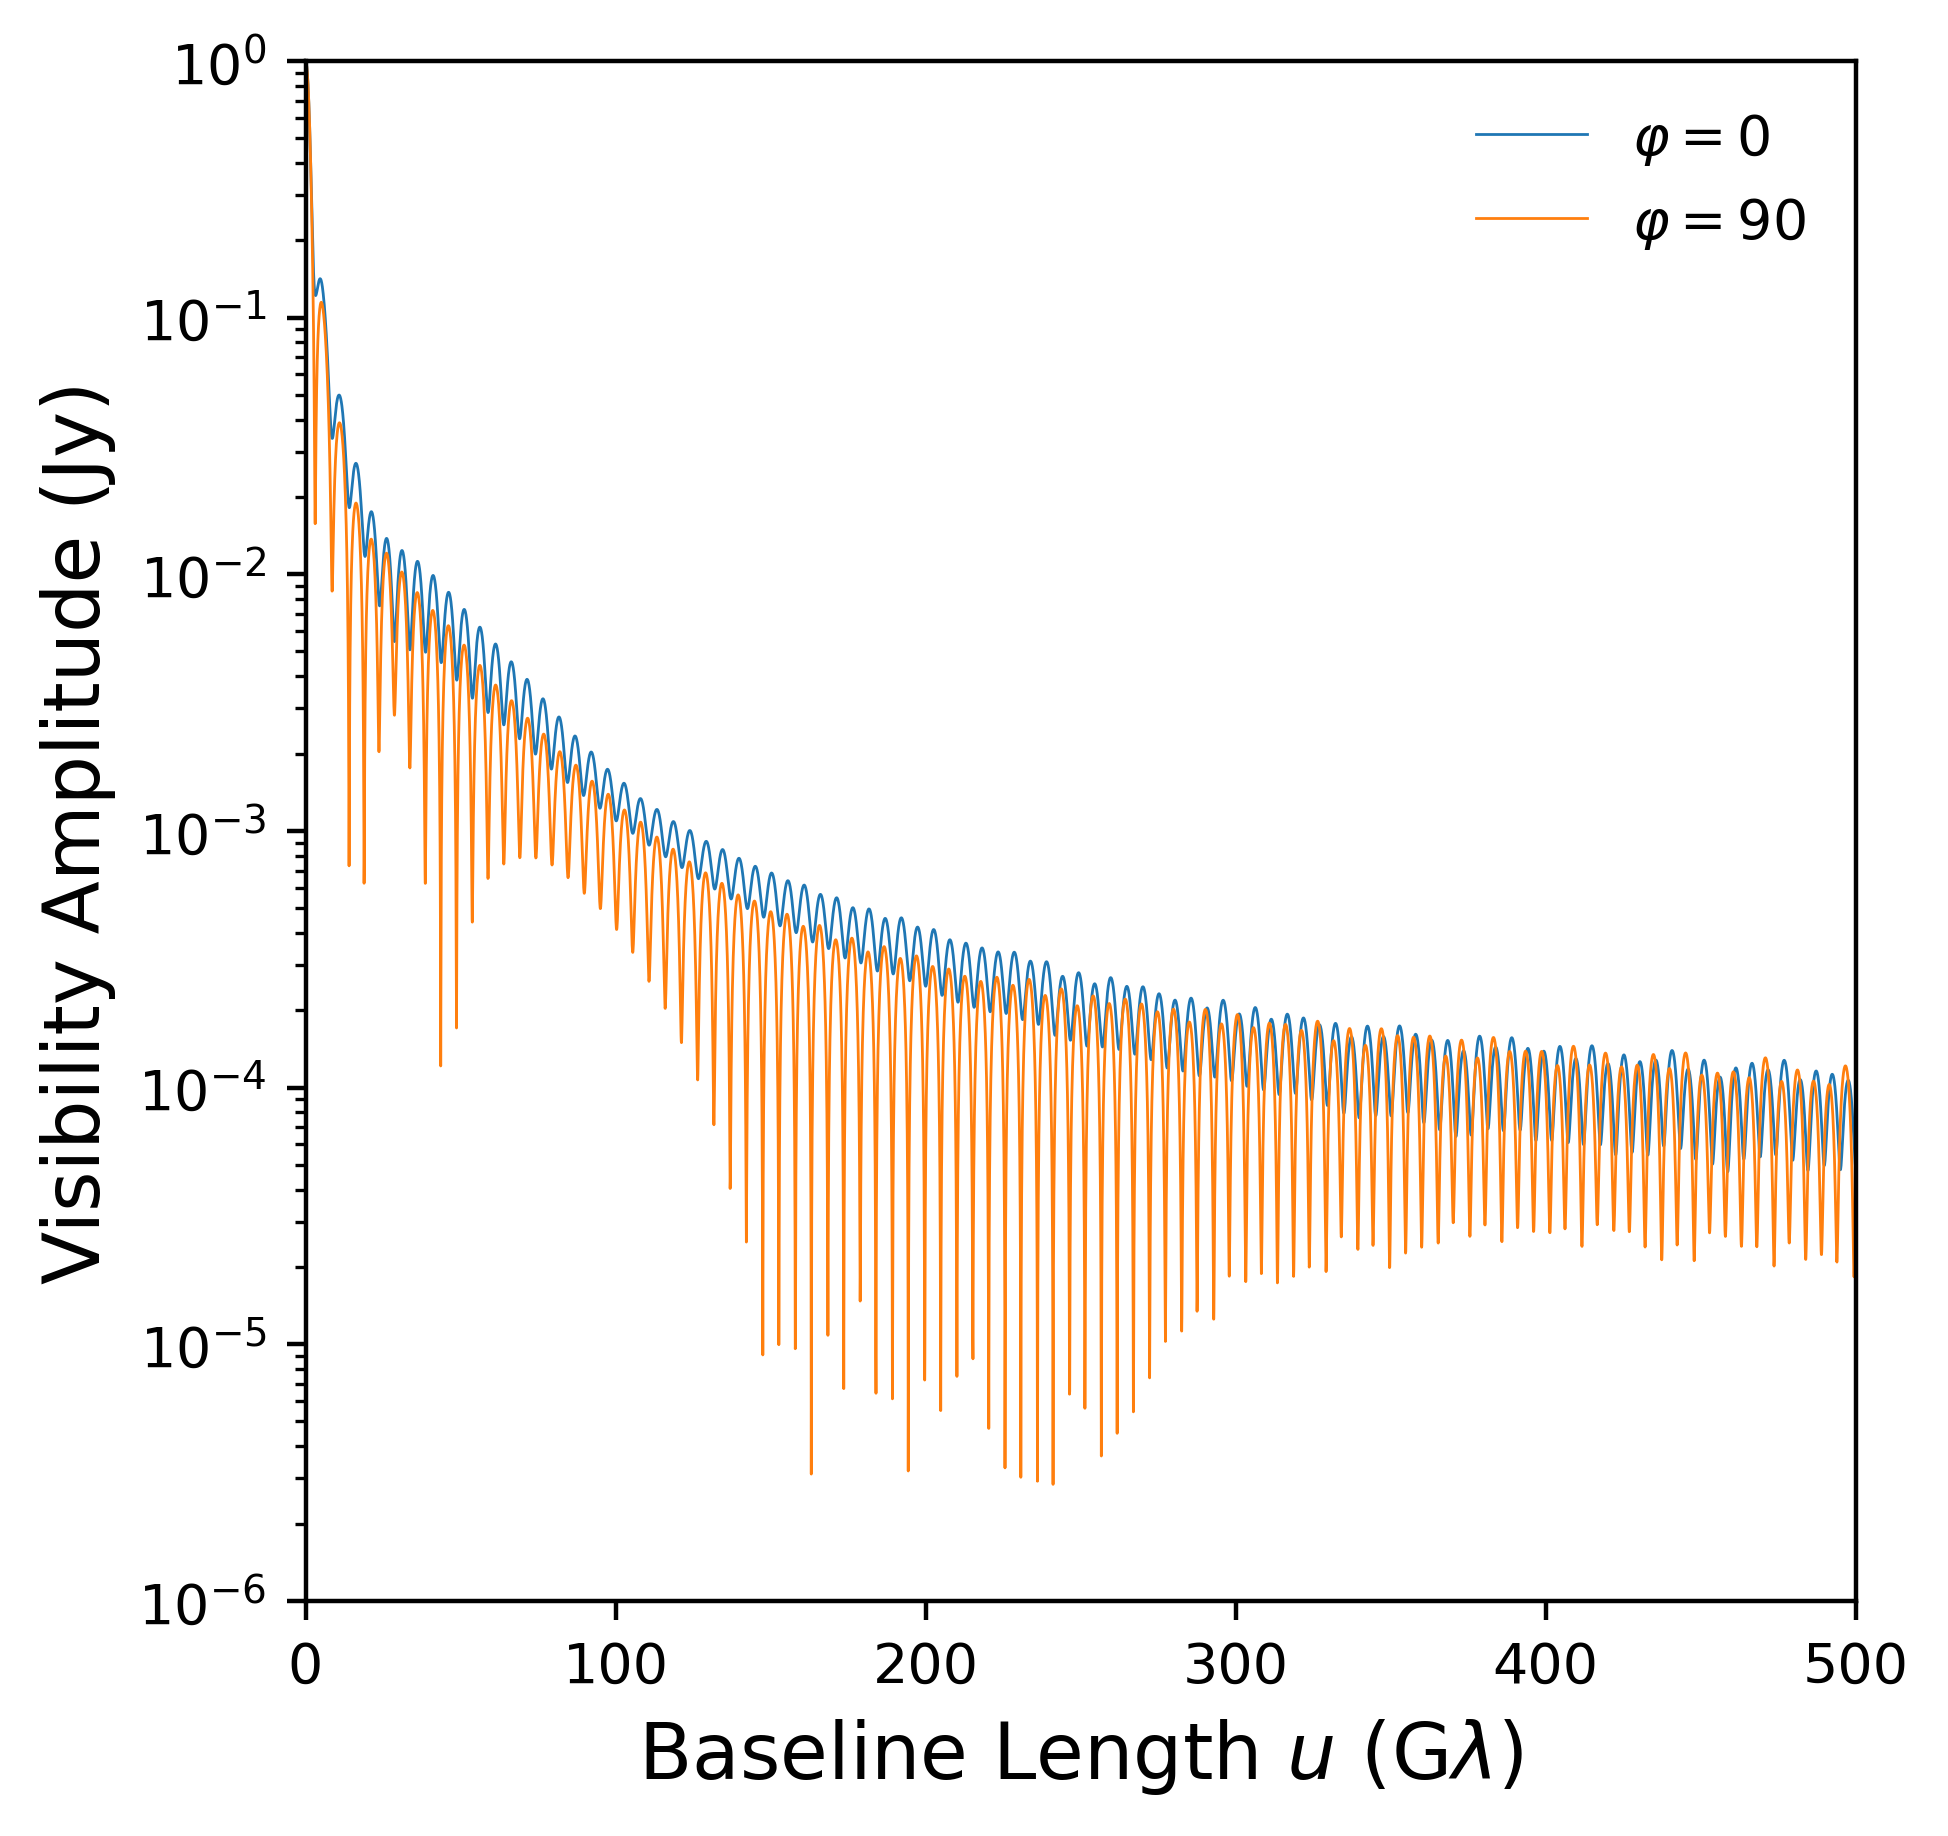

In [39]:
plt.figure(figsize=(5,5),dpi=400)

for i in range(len(radonangles)):
    plt.plot(freqss[0],visamps[i],linewidth=0.5,label=r"$\varphi=$"+"%s"%radonangles[i])
plt.yscale("log")
plt.ylabel("Visibility Amplitude (Jy)",size=14)
plt.xlabel("Baseline Length $u$ (G$\\lambda$)",size=14)
plt.legend(loc="best",frameon=False)
plt.xlim(0.,500.)
plt.ylim(1e-6,1)


#plt.savefig('Visamp.png',dpi=400,bbox_inches='tight')
plt.show()

## Use of ARRT with ``inoisy`` sources
This example uses a precomputed (<em>very low resolution!</em>) inoisy dataset. Details can be found in:

- https://github.com/AFD-Illinois/inoisy
- Lee, D., & Gammie, C. F. (2021). Disks as inhomogeneous, anisotropic gaussian random fields. The Astrophysical Journal, 906(1), 39.

For the moment, it's possible use the data in the repository. 

The ``inoisy`` code is used to model fluctuations in emission sources in the equatorial plane of a Kerr black hole. Specifically, inoisy generates a two-dimensional Gaussian random field with a Matérn covariance, providing a statistical model for a stochastic, non-stationary, non-axisymmetric source. These types of fluctuations can be applied to model variations in the emission from a source like M87*.

The use of inoisy introduces temporal variability in the source simulation, which would not be considered in simpler models that describe stationary or axisymmetric sources. AART, the main code used in this context, is capable of ray tracing from these stochastic realizations generated by inoisy, and then calculating the corresponding visibility curves to study the interferometric signature of the sources.

When inoisy is used, the key change is the introduction of fluctuations into the source model. Without inoisy, the models typically use simpler, stationary or axisymmetric sources. This means that the emission from the source does not show the variations expected from physical fluctuations, such as those modeled by inoisy. Fluctuations in the source affect how the images and interferometric signatures are produced, and they can help understand how the source variations influence the visibility of photon rings in observations.

#### Inoisy_1.py

In [31]:
#Abres el documento que ya se encuentra en el repositorio
inoisyfile = h5py.File("inoisy_1.h5", 'r')
i_fname="inoisy_1.h5"
print(f'el archivo inoisy.h5 contiene los siguientes directorios: \n', list(inoisyfile.keys()))

el archivo inoisy.h5 contiene los siguientes directorios: 
 ['data', 'params']


In [33]:
# Esta es la función que se llama en cada visita del árbol
def print_h5_structure(name, obj):
    print(name)

with h5py.File('inoisy_1.h5', 'r') as inoisyfile:
    print("Estructura completa del archivo inoisy_1.h5:")
    inoisyfile.visititems(print_h5_structure)

Estructura completa del archivo inoisy_1.h5:
data
data/data_env
params
params/dx1
params/dx2
params/x0end
params/x0start
params/x1end
params/x1start
params/x2end
params/x2start


#### Inoisy_2.py

In [19]:
#Abres el documento que ya se encuentra en el repositorio
inoisyfile = h5py.File("inoisy_2.h5", 'r')
i_fname="inoisy_2.h5"
print(f'el archivo inoisy.h5 contiene los siguientes directorios: \n', list(inoisyfile.keys()))

el archivo inoisy.h5 contiene los siguientes directorios: 
 ['data', 'params']


In [13]:
# Esta es la función que se llama en cada visita del árbol
def print_h5_structure(name, obj):
    print(name)

with h5py.File('inoisy_2.h5', 'r') as inoisyfile:
    print("Estructura completa del archivo inoisy_2.h5:")
    inoisyfile.visititems(print_h5_structure)

Estructura completa del archivo inoisy.h5:
data
data/data_raw
data/lc_raw
params
params/avg_raw
params/dx0
params/dx1
params/dx2
params/max_raw
params/min_raw
params/ni
params/nj
params/nk
params/npi
params/npj
params/npk
params/seed
params/var_raw
params/x0end
params/x0start
params/x1end
params/x1start
params/x2end
params/x2start


#### Using Inoisy file

In [23]:
# The inoisy files contain lots of useful information. 
#Here we will just extract what we need for this example. 
try:
    data = np.array(inoisyfile['data/data_raw'])

    #Limits of the figure
    xystart = np.array(inoisyfile['params/x1start'])
except:
    data = np.array(inoisyfile['data/data_env'])

    #Limits of the figure
    xystart = np.array(inoisyfile['params/x1start'])[0]


print("There are %s snapshots in this inoisy data set"%data.shape[0])
print("Each one has a %s x %s size"%(data.shape[1],data.shape[2]))

There are 256 snapshots in this inoisy data set
Each one has a 256 x 256 size


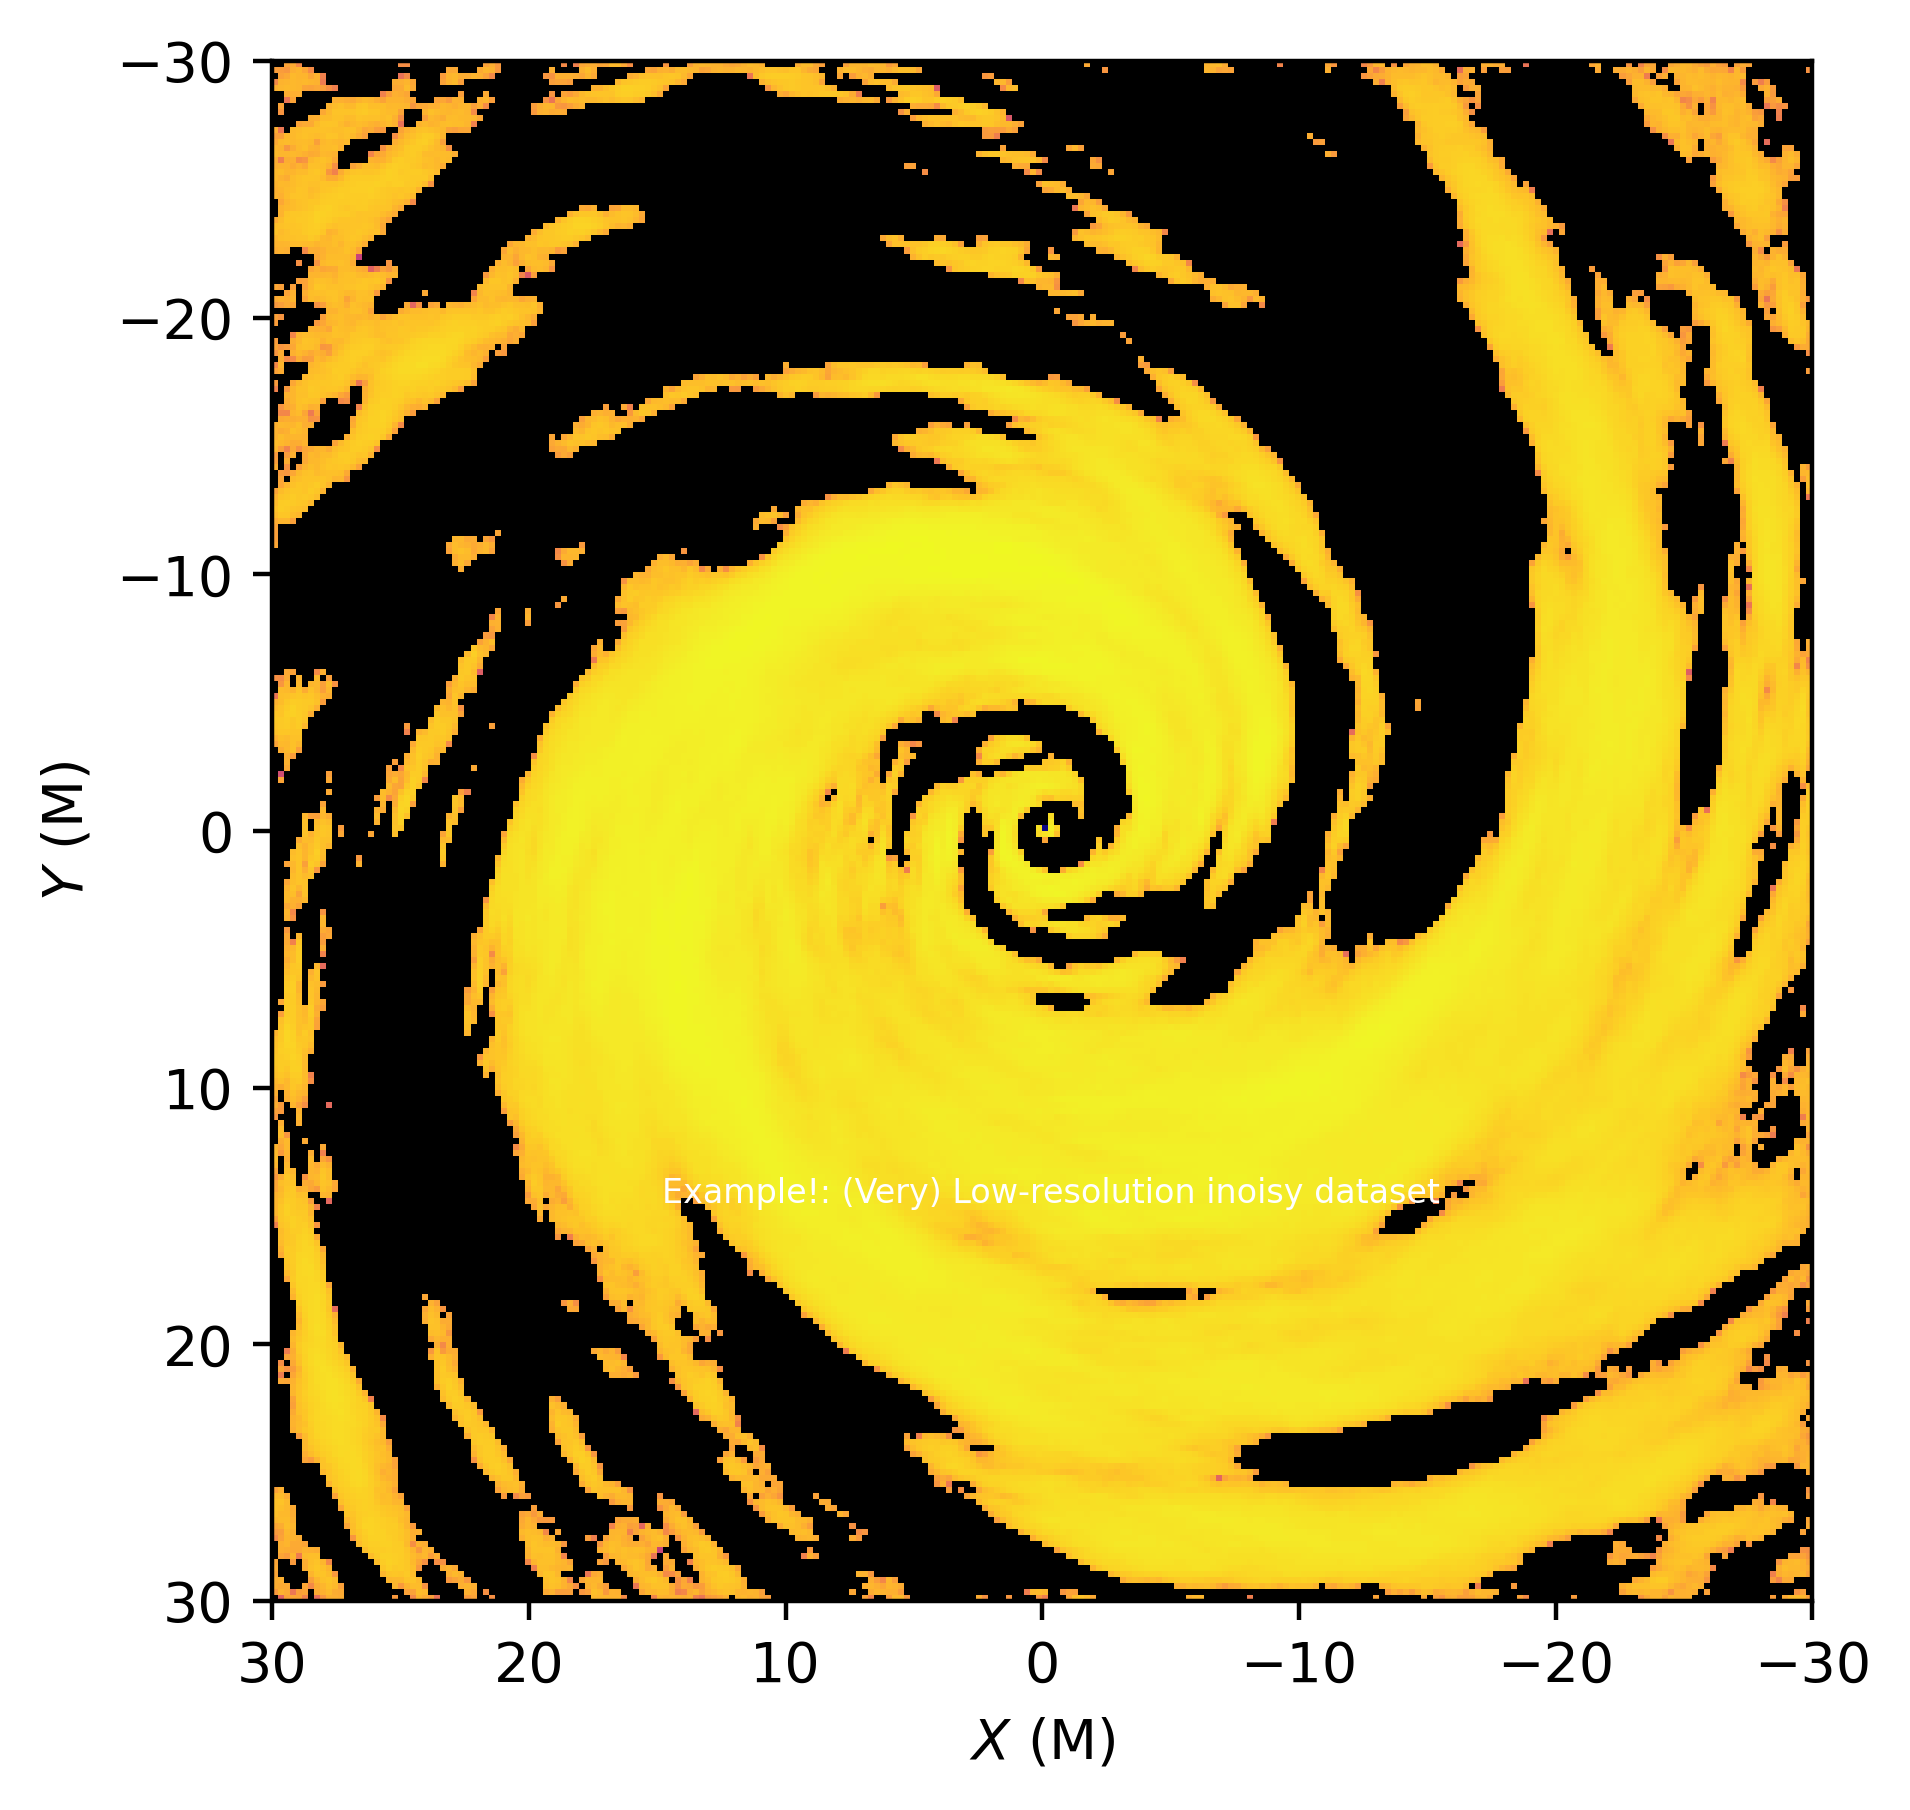

In [27]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

#You can select different snapshots by changing the slicing 
ax.imshow(np.log(data[200,:,:]),cmap="plasma",origin="lower",extent=[-xystart,xystart,-xystart,xystart])

ax.set_facecolor('xkcd:black')
ax.set_xlabel(r"$X$"+" "+"(M)")
ax.set_ylabel(r"$Y$"+" "+"(M)")
ax.text(14.8,14.5,"Example!: (Very) Low-resolution inoisy dataset",color="w",fontsize=6)
#plt.savefig(f'InoisySnapshot.png',dpi=400,bbox_inches='tight')
plt.show()

Now we need to do the ray-trade bit with this low-resolution equatorial profile. For that porpue we will tu use the scropt ``iImages.py``, here the information of the lensing bands will be used and also the information of the ray tracing made before. After this, ARRT obtain the image of the black hole with the calculation of the intensity using fast light mode or slow light. 

In the code, the condition if ``disk == "dynamical"`` checks whether the source model is dynamic (meaning the source varies over time). If this is the case, the code uses the slow-light method, which is more accurate and takes into account the temporal variations of the source for each frame.

In the other case, when the variable disk is not equal to ``"dynamical"``, the source model is assumed to be static, meaning there are no time-dependent variations in the emission. In this case, the fast-light method is used, which is more efficient in terms of computation because it does not need to consider the temporal evolution of the source.

In [39]:
%time !python iImages.py


Thanks for using AART
Copyright (C) 2024, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing a single image 

Reading file:  ./Results/LensingBands_a_0.5_i_17.h5
Reading file:  ./Results/Rays_a_0.5_i_17.h5
Reading inoisy file:  inoisy.h5
AART starts!
Using all the available inoisy frames
Computing lensed image using all inoisy frames
Images file  ./Results/Dynamical_Image_a_0.5_i_17.h5  created.
CPU times: total: 31.2 ms
Wall time: 9.6 s


In [17]:
fimages="./Results/Dynamical_Image_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fimages)

h5f = h5py.File(fimages,'r')

I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]

print(f'el archivo {fimages} contiene los siguientes directorios: \n', list(h5f.keys()))

h5f.close()

Reading file:  ./Results/Dynamical_Image_a_0.5_i_17.h5
el archivo ./Results/Dynamical_Image_a_0.5_i_17.h5 contiene los siguientes directorios: 
 ['bghts0', 'bghts1', 'bghts2']


array([[-0.01845831, -0.01706578, -0.01567342, ...,  0.01072058,
         0.01122924,  0.01173812],
       [-0.01796517, -0.01656598, -0.01516696, ...,  0.01000183,
         0.01049159,  0.01098156],
       [-0.01747325, -0.01606732, -0.01466153, ...,  0.00928326,
         0.00975417,  0.01022529],
       ...,
       [ 0.05993757,  0.06014071,  0.06034354, ...,  0.02097766,
         0.02140037,  0.02182226],
       [ 0.05933403,  0.05953654,  0.05974009, ...,  0.02074618,
         0.02115452,  0.02156203],
       [ 0.05867086,  0.05885412,  0.05903843, ...,  0.02051367,
         0.0209077 ,  0.0213009 ]])

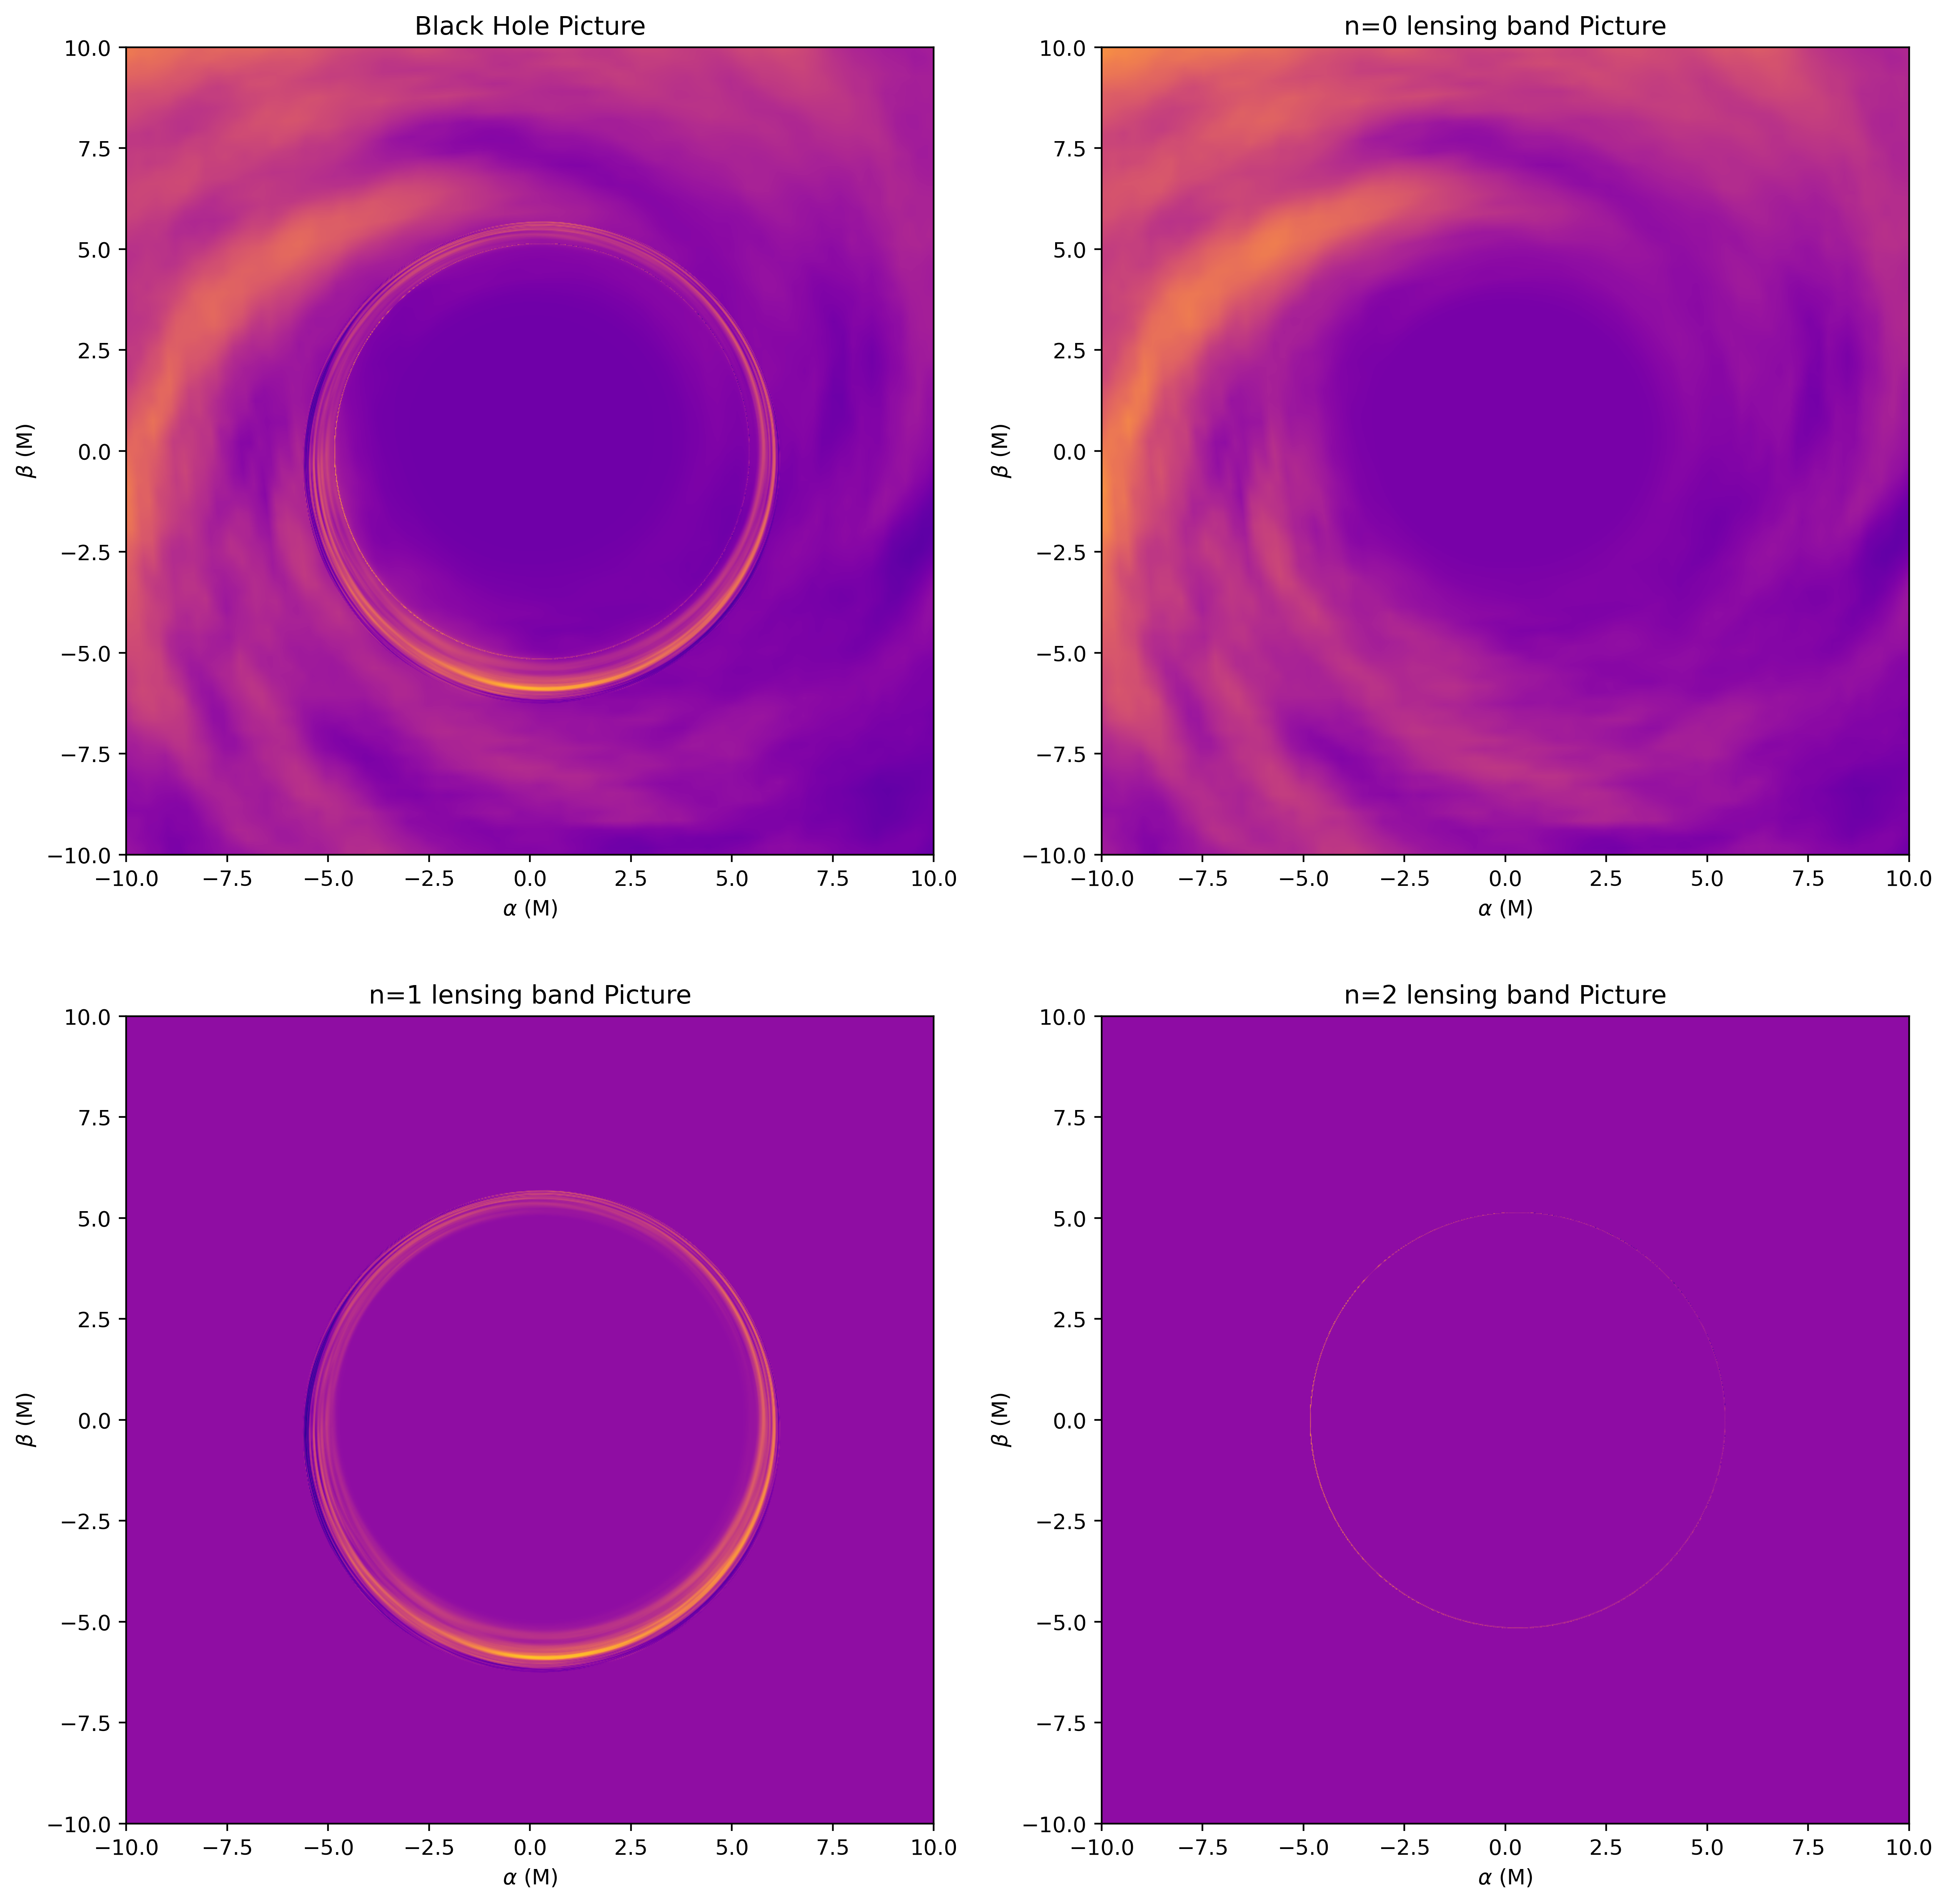

In [49]:
plt.figure(figsize=(15,15),dpi=400)

plt.subplot(2,2,1)
plt.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r"Black Hole Picture")

plt.subplot(2,2,2)
plt.imshow(I0,vmax=np.max(I0)*1.2,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r"n=0 lensing band Picture")

plt.subplot(2,2,3)
plt.imshow(I1,vmax=np.max(I1)*1.2,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r"n=1 lensing band Picture")

plt.subplot(2,2,4)
plt.imshow(I2,vmax=np.max(I2)*1.2,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
plt.xlabel(r"$\alpha$"+" "+"(M)")
plt.ylabel(r"$\beta$"+" "+"(M)")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r"n=2 lensing band Picture")

plt.savefig(f'IntensityImages_{spin_case}_{i_case}.png',dpi=400,bbox_inches='tight')

plt.show()

## Production of the movie 
Here we do de movie of the black hole. With the param ``snapshots`` we can control the number of snapshots that we want for the movie. For computational reasons I calculate only 4 images like in the article of ARRT. 

In [37]:
%time !python iMovies.py

^C
CPU times: total: 109 ms
Wall time: 15.3 s


In [31]:
fimages="./Results/Images_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fimages)

h5f = h5py.File(fimages,'r')

Is0=h5f['bghts0'][:]
Is1=h5f['bghts1'][:]
Is2=h5f['bghts2'][:]

h5f.close()

Reading file:  ./Results/Images_a_0.5_i_17.h5


In [33]:
Is0

array([], dtype=float64)

In [35]:
fignames=[]
VMAX=np.max(Is0+Is1+Is2)
for tsnap in np.arange(snapshots):
    fig, ax = plt.subplots()
    
    ax.imshow(Is0[tsnap,:,:]+Is1[tsnap,:,:]+Is2[tsnap,:,:],vmax=VMAX,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    
    ax.set_xlabel(r"$\alpha$"+" "+"(M)")
    ax.set_ylabel(r"$\beta$"+" "+"(M)")
    
    fignames.append('Fig%s.png'%tsnap)
    plt.savefig('Fig%s.png'%tsnap,dpi=400,bbox_inches='tight')
    plt.close(fig)

with imageio.get_writer('BHMovie.gif', mode='I') as writer:
    for filename in fignames:
        image = imageio.imread(filename)
        writer.append_data(image)

# We delete the created images and just keep the GIF
for filename in set(fignames):
    os.remove(filename)

ValueError: zero-size array to reduction operation maximum which has no identity

## Generación figura 13
La curva de luz se genera como la suma de los flujos de luz, es decir, podemos considerarla como la suma de las intensidades en la imagen, por lo que tendremos que hacer la comparación entre los snpshots generados por ``inoisy`` y los que pasan por raytracing

In [60]:
N_pictures = len(data)

Light_curve = np.zeros(N_pictures) 

for i in range(N_pictures):
    Light_curve[i] = np.sum(data[i,:,:])

Max_Light_curve = np.max(Light_curve)

Light_NormalCurve = Light_curve/Max_Light_curve

T_LightCurve = np.arange(N_pictures)

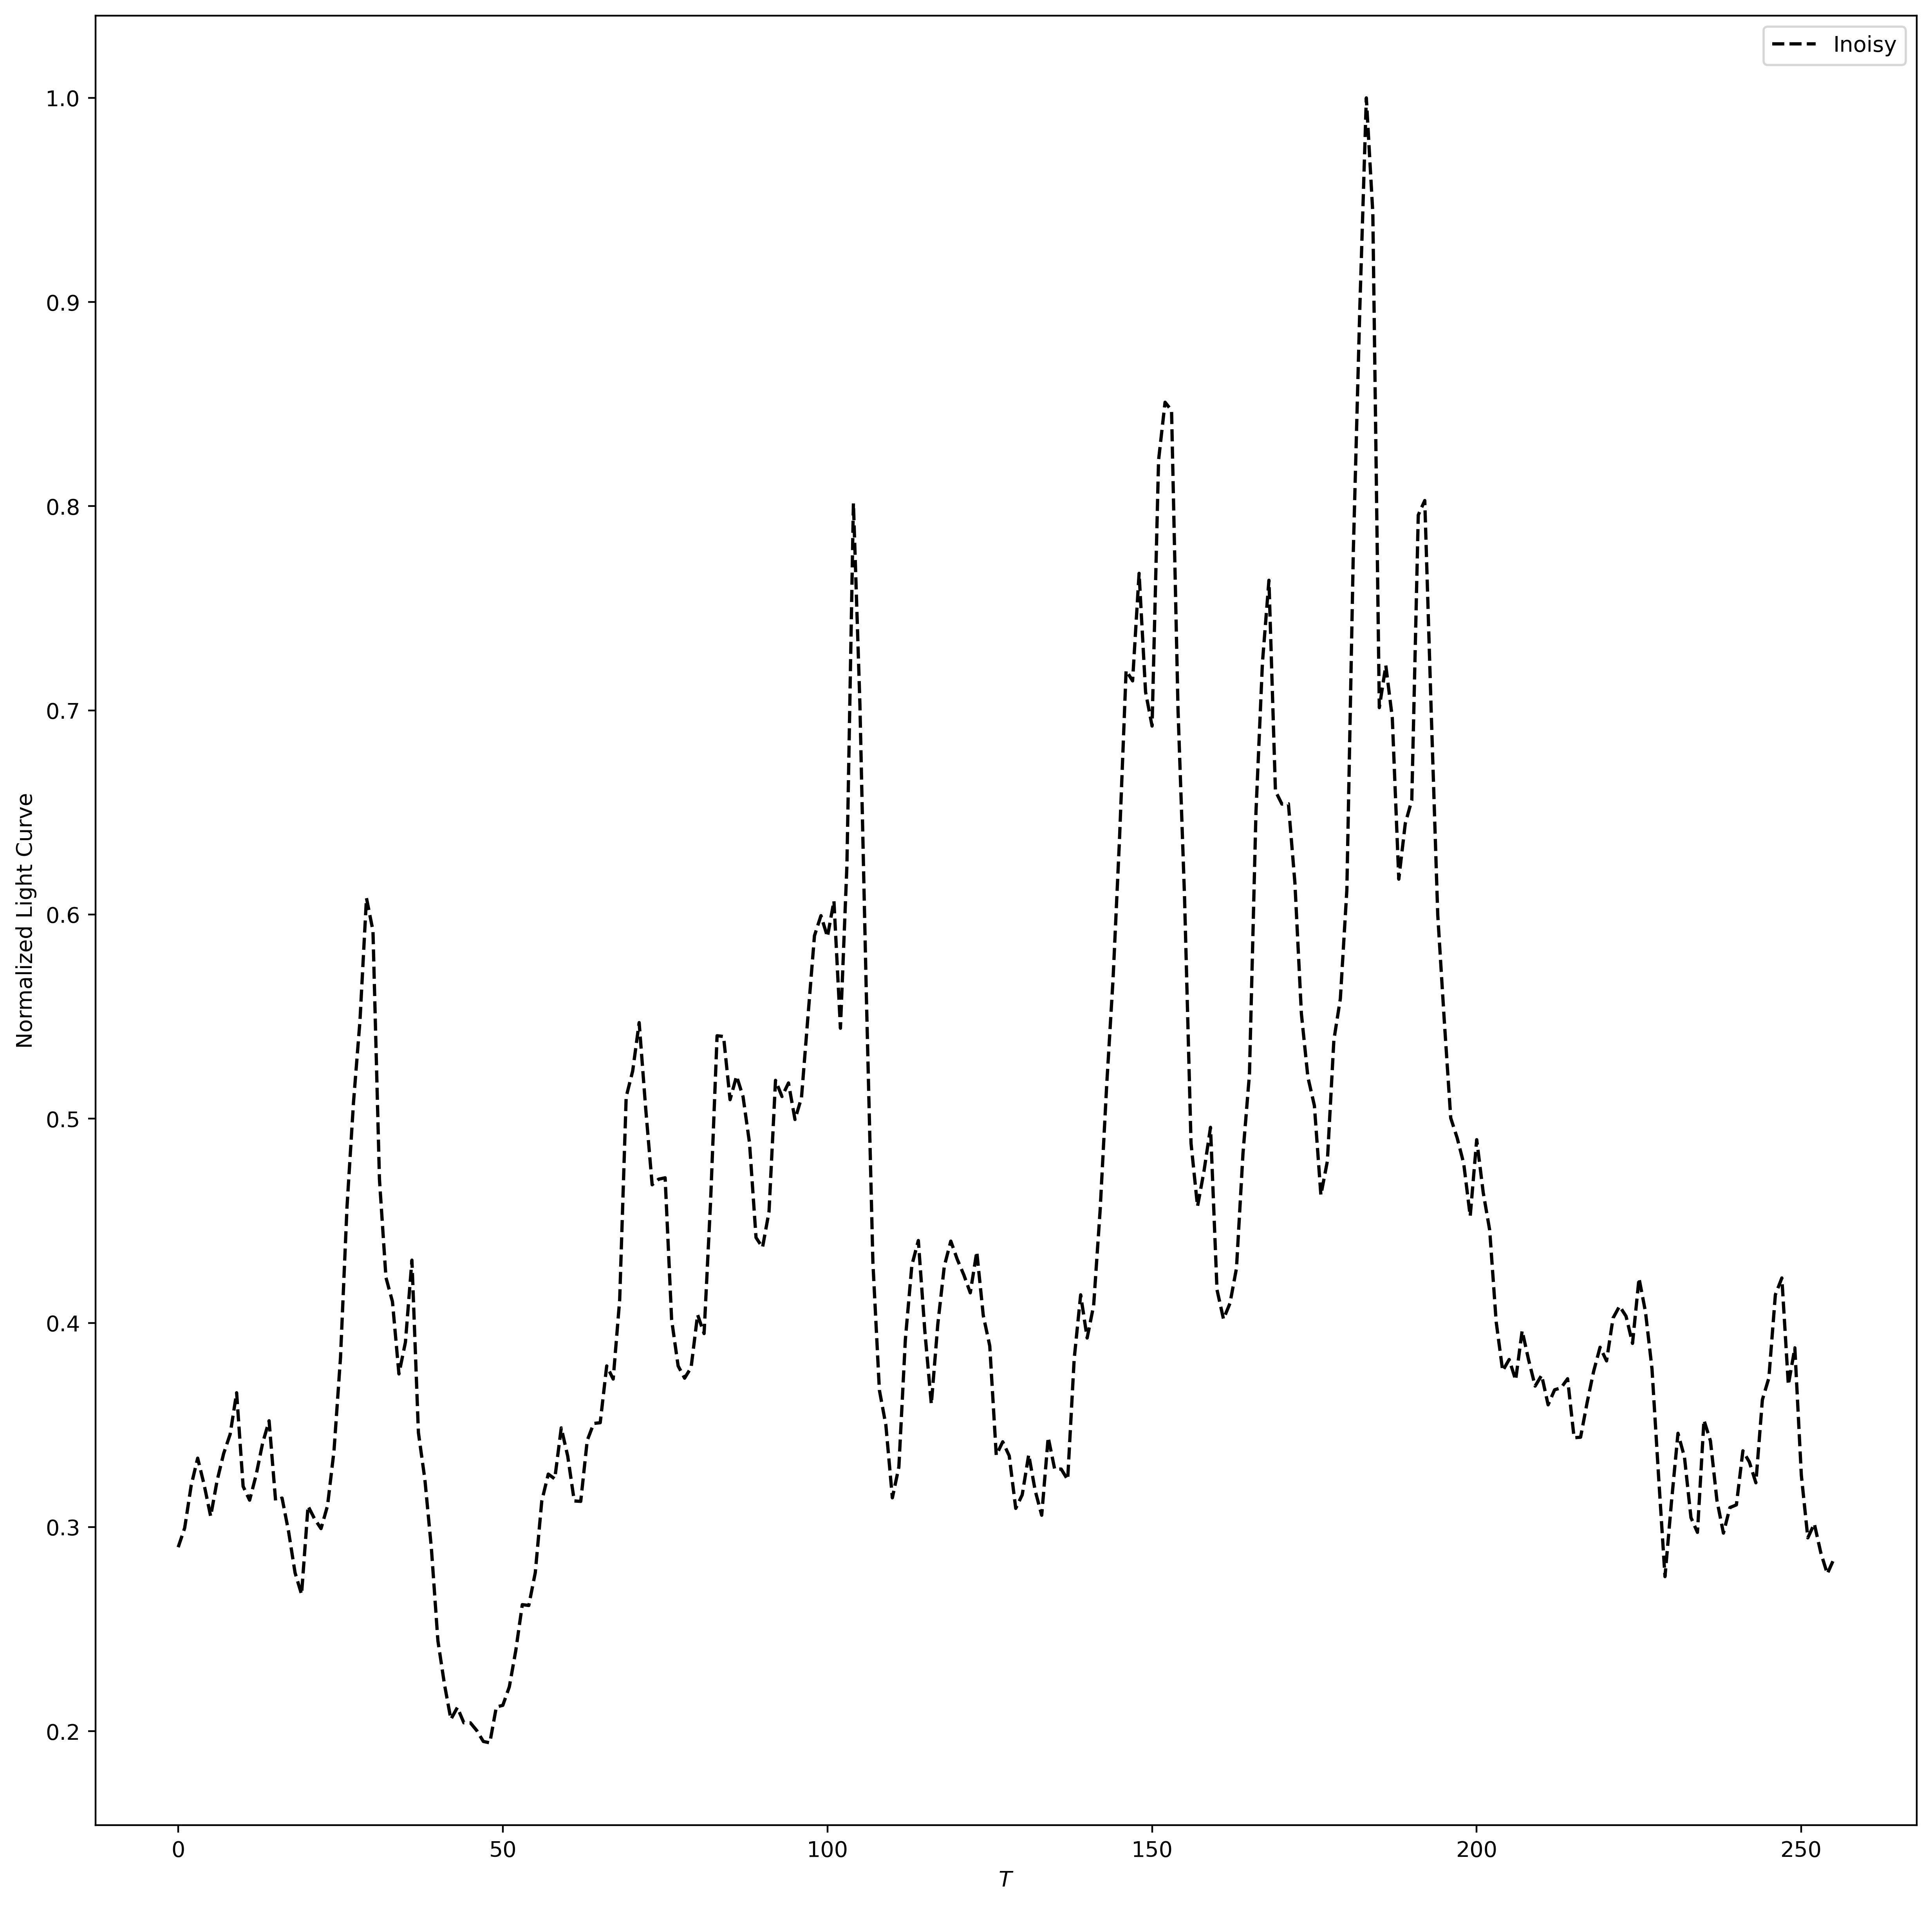

In [81]:
plt.figure(figsize=(15,15),dpi=400)

plt.plot(T_LightCurve,Light_NormalCurve, linestyle="--", label ='Inoisy' , color = 'k')
plt.xlabel(r"$T$")
plt.ylabel(r"Normalized Light Curve")
plt.legend()


plt.show()